# **AP155 Lab Assignment**
## Module 5: Partial Differential Equations

_Instructions_: Answer each problem as completely as you can. Discuss **all** your answers as clearly and concisely as possible.

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points**.



### Student Information

_Full Name (Last Name, First Name)_: Quiamjot, Allyn Christian \
_Student No._: 2021-07198\
_Section_: HX-2

### Submission Information

_Date and Time Submitted (most recent upload)_: Dec 3, 2023 7:39PM

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name: ALLYN CHRISTIAN I. QUIAMJOT**

### Grading Information (c/o Lab Instructor)

TOTAL SCORE: **[]**/100

Score breakdown:
* Problem 1 - []/100

_Date and Time Scored (MM/DD/YYYY HH:MM AM/PM):_

### PROBLEM 1
**The Schrodinger equation and the Crank-Nicolson method**

_Refer to Exercise 9.8 in the Newman text._ In this problem, you will use the Crank-Nicolson method to solve the full time-dependent Schrodinger equation and hence develop a picture of how a wavefunction evolves over time.

Consider an electron (mass $M = 9.109 \times 10^{-31}$ kg) in a box of length $L = 10^{-8}$ m. Suppose that at time $t = 0$ the wavefunction of the electron has the form

$$ \psi(x,0) = \exp\left[-\frac{(x-x_0)^2}{2\sigma^2}\right]e^{i\kappa x},$$
where $x_0 = \frac{L}{2}$, $\sigma = 1 \times 10^{-10}$ m, $\kappa = 5 \times 10^{10} {\rm m}^{-1}$,  and $\psi = 0$ on the walls at $x = 0$ and $x = L$.

1. Perform a single step of the Crank-Nicolson method for this electron, calculating the vector $\psi(t)$ of values of the wavefunction, given the initial wavefunction above and using $N = 1000$ spatial slices with $a = L/N$. Your program will have to perform the following steps. First, given the vector $\psi(0)$ at $t = 0$, you will have to multiply by the matrix $\bf{B}$ to get a vector $\bf{v} = \bf{B}\psi$. Because of the tridiagonal form of $\bf{B}$, this is fairly simple. The $i$th component of $\bf{v}$ is given by
$$ v_i = b_1\psi_i + b_2(\psi_{i+1} + \psi_{i-1}).$$

   You will also have to choose a value for the time-step $h$. A reasonable choice is $h = 10^{-18}$ s. *(30 pts.)*

2. Second you will have to solve the linear system ${\bf Ax}= {\bf v}$ for $\bf{x}$, which gives you the new value of $\psi$. You could do this using a standard linear equation solver like the function $\tt solve$ in numpy's $\tt linalg$. *(20 pts.)*

3. Once you have the code in place to perform a single step of the calculation, extend your program to perform repeated steps and hence solve for $\psi$ at a sequence of times a separation $h$ apart. Note that the matrix $\bf A$ is independent of time, so it doesn't change from one step to another. You can set up the matrix just once and then keep on reusing it for every step. *(30 pts.)*

4. Make an animation of the solution by displaying the real part of the wavefunction at each time-step. You can use the function rate from the package visual to ensure a smooth frame-rate for your animation-- see Section 3.5 on page 117 of the Newman text.

   Run your animation for a while and describe what you see. Write a few sentences explaining in physics terms what is going on in the system. *(20 pts.)*

In [1]:
from numpy import copy

def banded(Aa,va,up,down):

    # Copy the inputs and determine the size of the system
    A = copy(Aa)
    v = copy(va)
    N = len(v)

    # Gaussian elimination
    for m in range(N):

        # Normalization factor
        div = A[up,m]

        # Update the vector first
        v[m] /= div
        for k in range(1,down+1):
            if m+k<N:
                v[m+k] -= A[up+k,m]*v[m]

        # Now normalize the pivot row of A and subtract from lower ones
        for i in range(up):
            j = m + up - i
            if j<N:
                A[i,j] /= div
                for k in range(1,down+1):
                    A[i+k,j] -= A[up+k,m]*A[i,j]

    # Backsubstitution
    for m in range(N-2,-1,-1):
        for i in range(up):
            j = m + up - i
            if j<N:
                v[m] -= A[i,j]*v[j]

    return v

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math as m

#   Declaring constants
sigma = 1e-10
kappa = 5e10
L = 1e-8
N = 1000
M = 9.109e-31
h = 1e-18
h_bar = 1.054571817e-34
x0 = L/2

a = L/N

psi = np.zeros(N+1,complex)         #   initialize wave function

#   coefficients of Crank-Nicolson method in the A and B vector triagonals
a1 = 1 + h*1j*h_bar/(2*M*a**2)
a2 = -h*1j*h_bar/(4*M*a**2)
b1 = 1 - h*1j*h_bar/(2*M*a**2)
b2 = h*1j*h_bar/(4*M*a**2)

#   defining initial wave function (t=0)
def PSI(x):
    return np.exp(-((x-x0)**2)/(2*sigma**2))*np.exp(1j*kappa*x)

x = np.linspace(0,L,N+1)            #   generate array with N+1 evenly spaced points given length of box
psi[:]= PSI(x)                      #   assign initial wave function to an array
psi[[0,N]] = 0                      #   setting boundary condition, wavefunction is 0 at x=0 and x=L

#   generate 3xN matrix with 1st,2nd,3rd row filled with a2,a1,a2 respectively.
A = np.empty((3,N),complex)         
A[0,:] = a2
A[1,:] = a1
A[2:,] = a2

#   the banded function transforms the 3xN matrix into the elements of vector A. 
#   it then returns the waverfunction by solving Ax = v, where x is the wavefunction

c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\cbook\__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


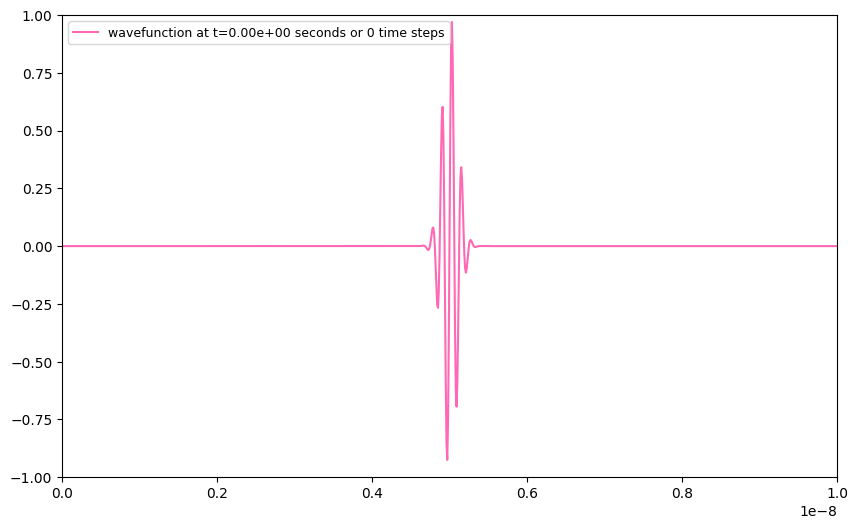

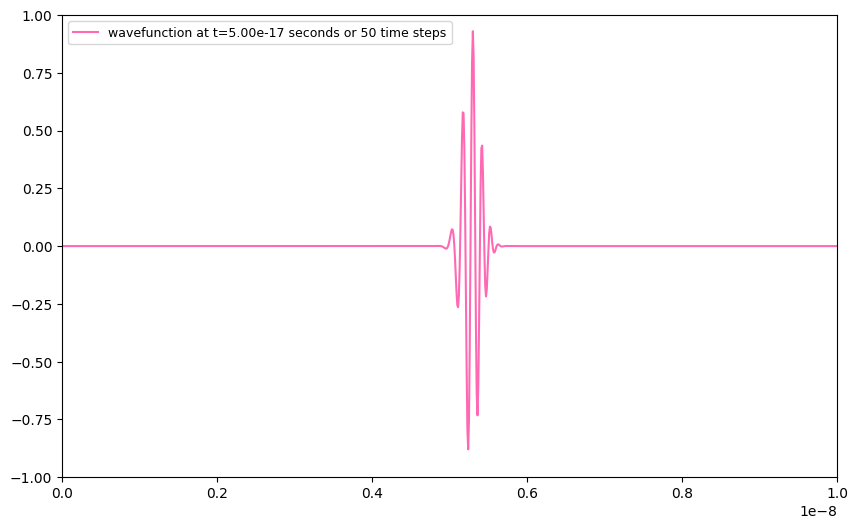

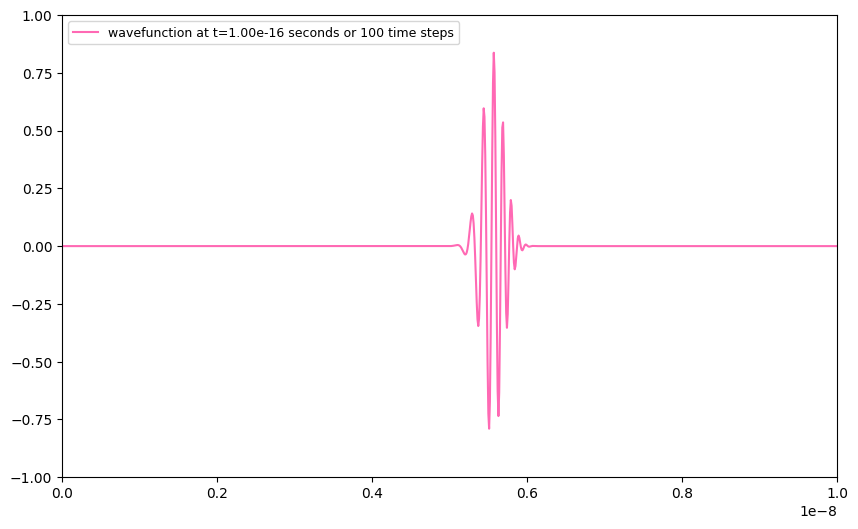

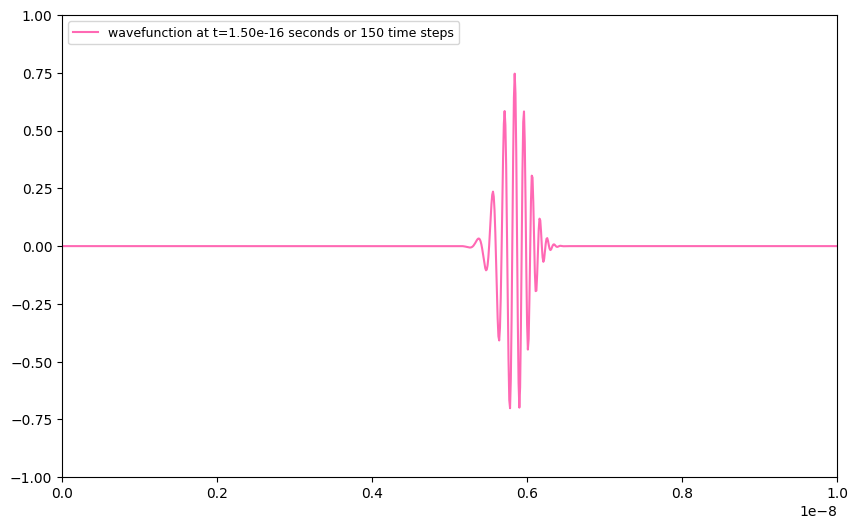

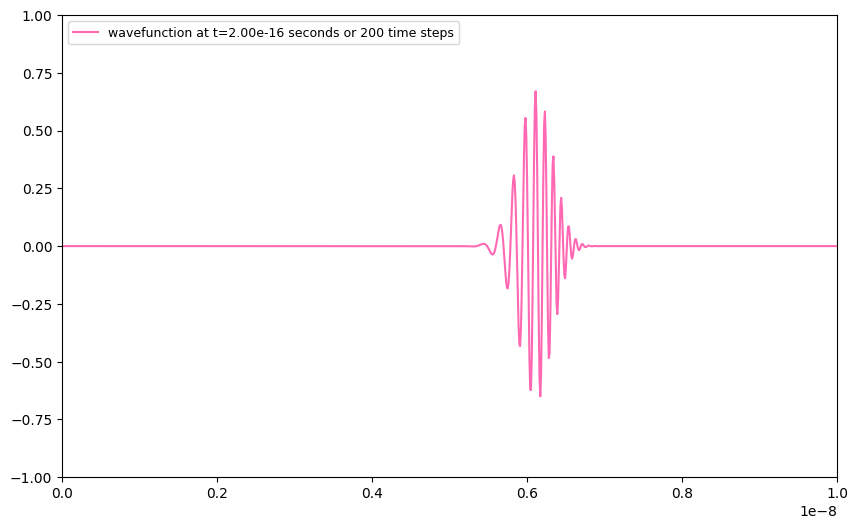

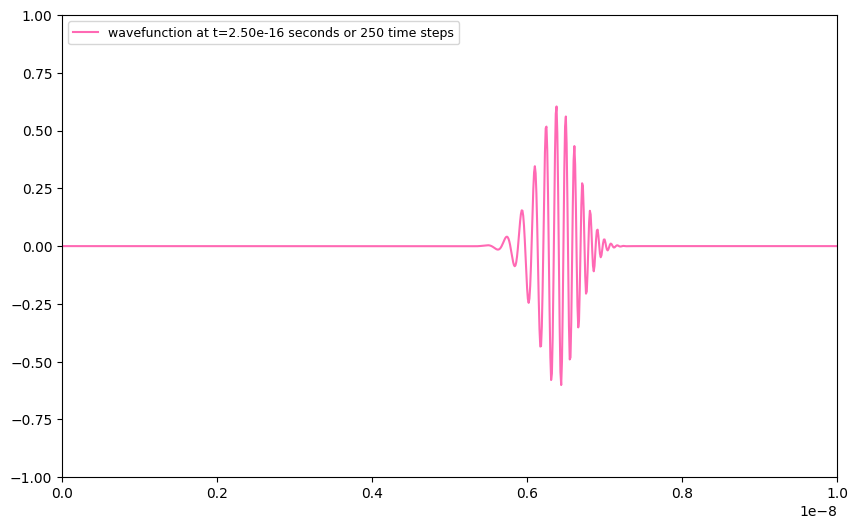

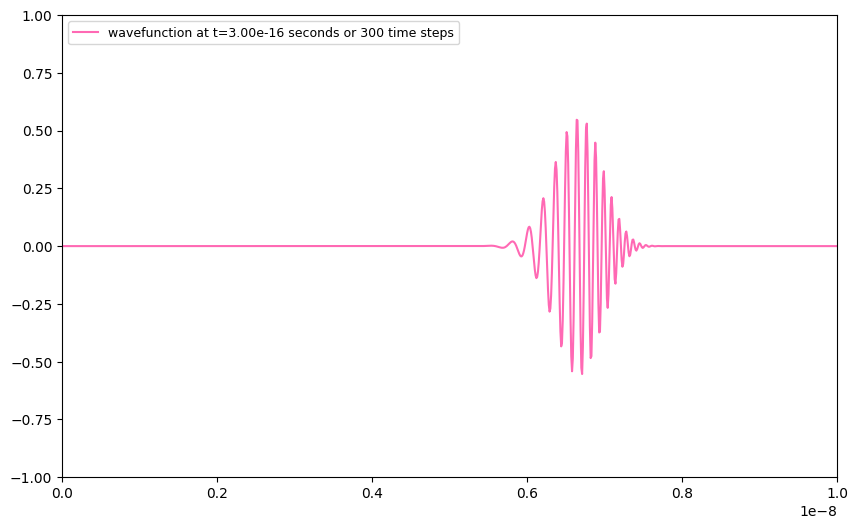

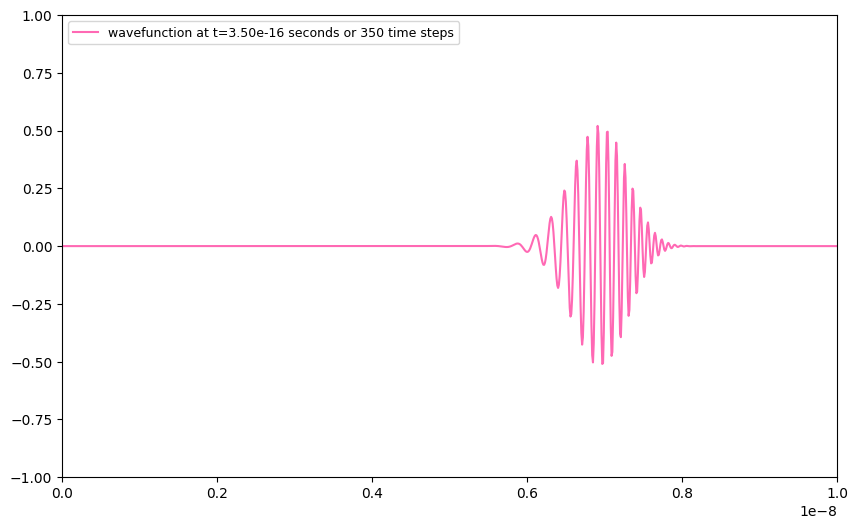

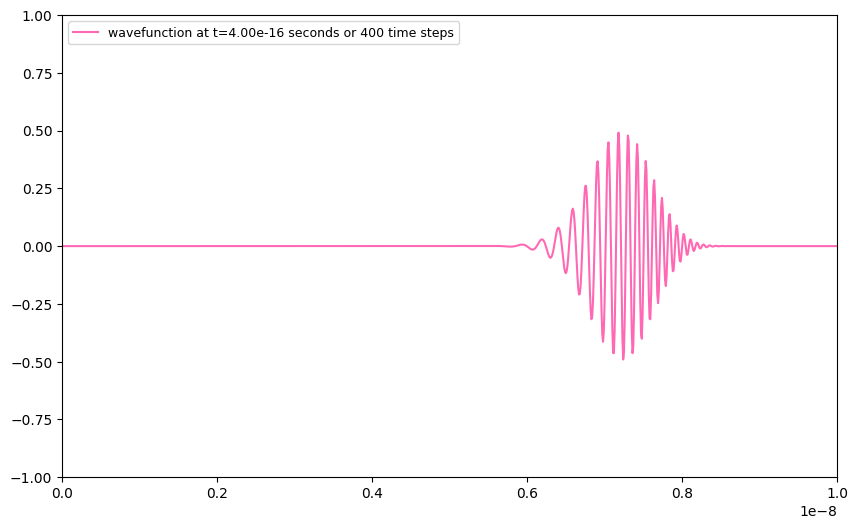

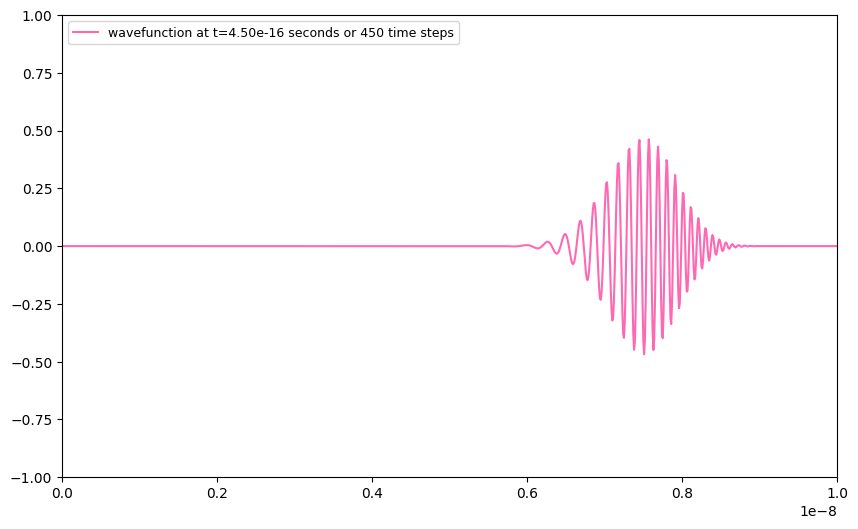

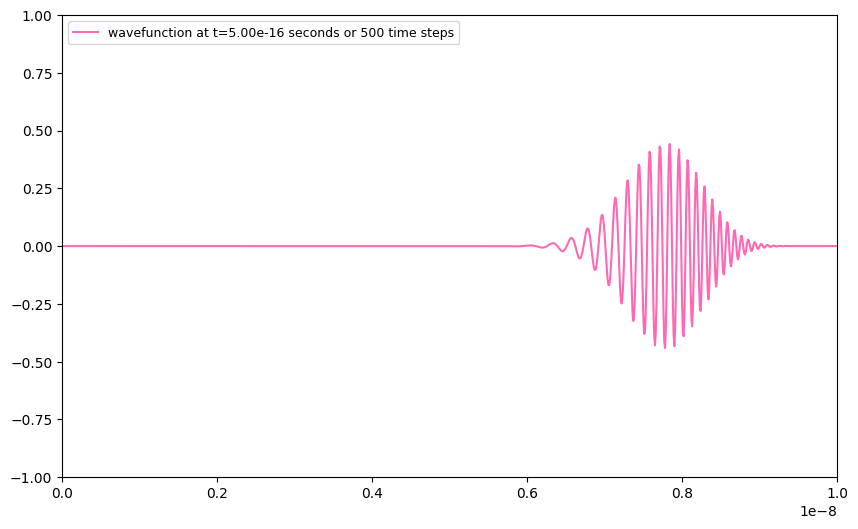

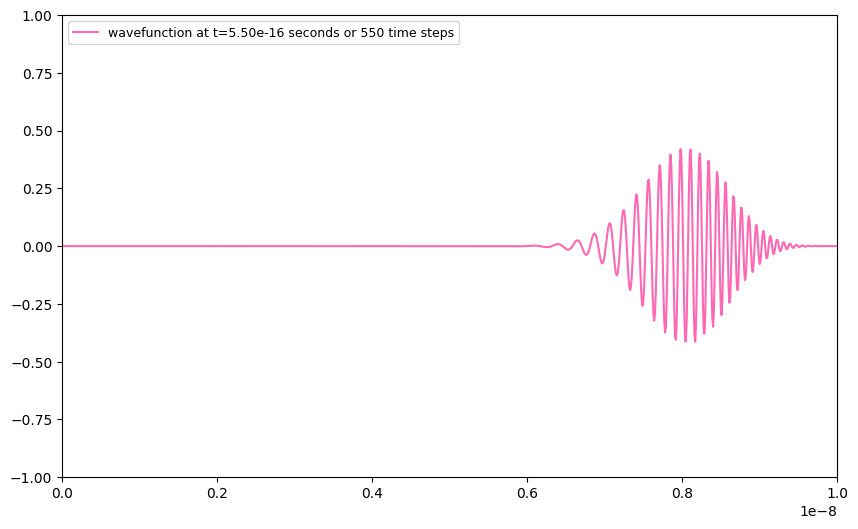

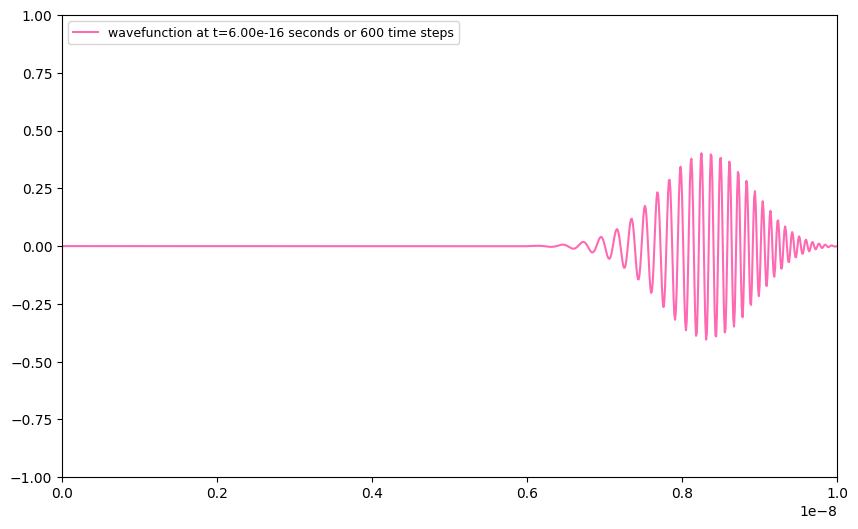

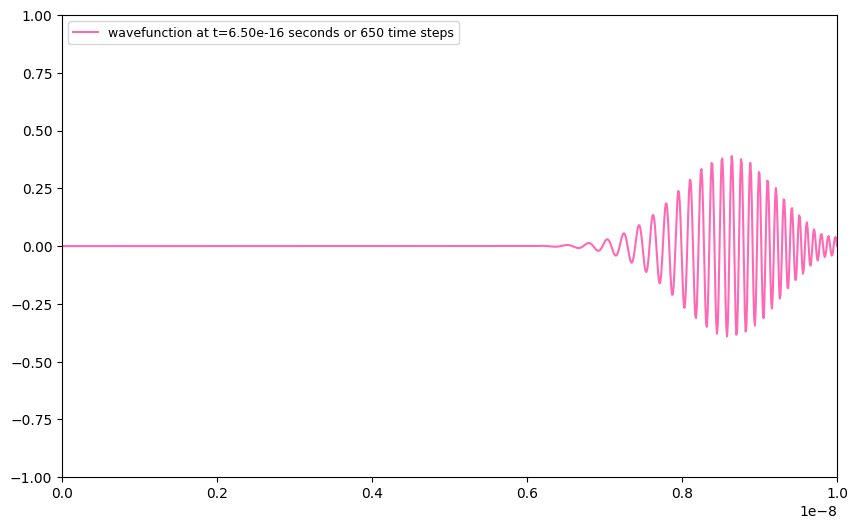

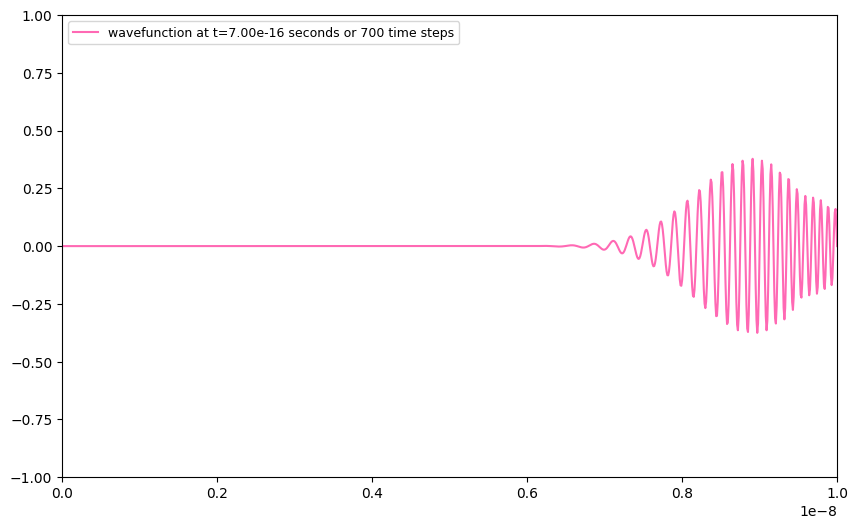

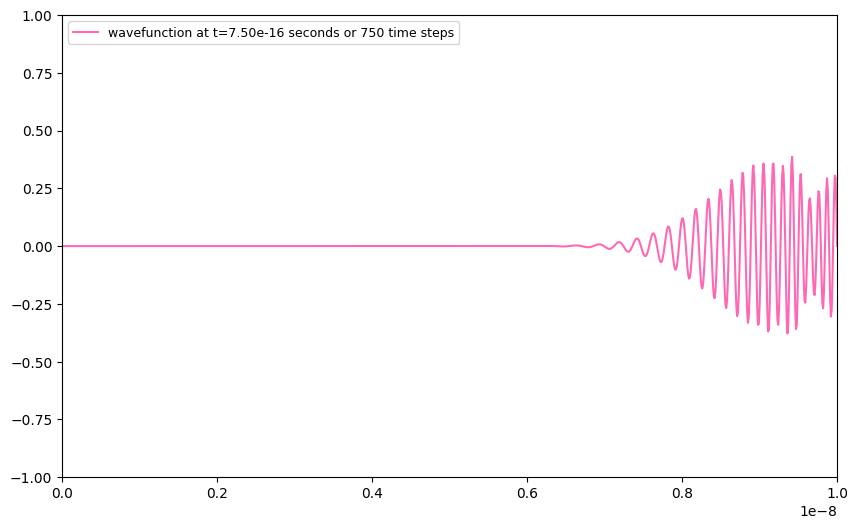

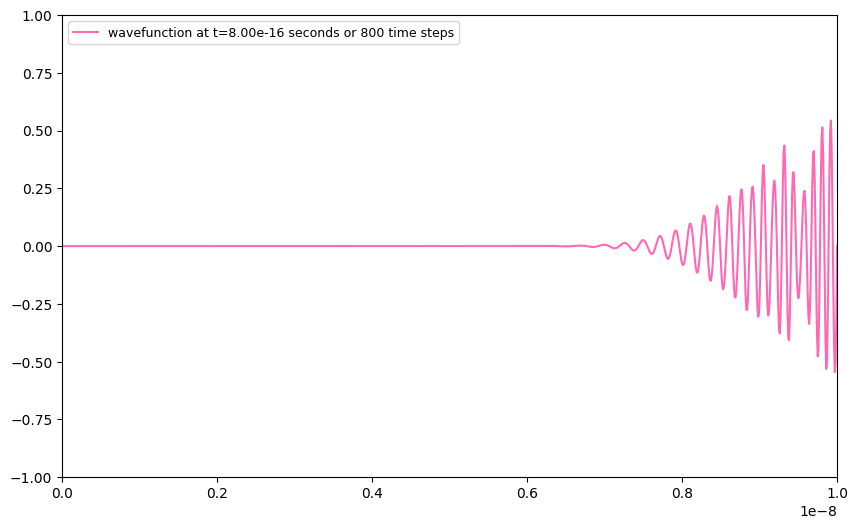

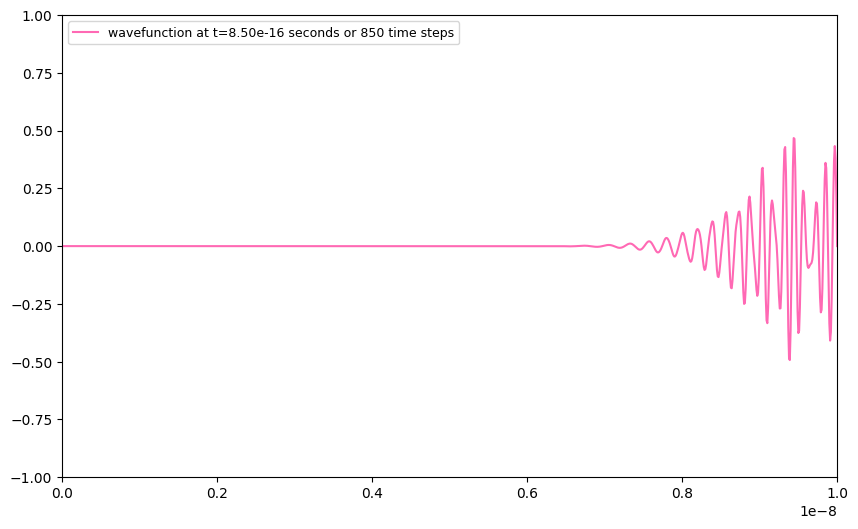

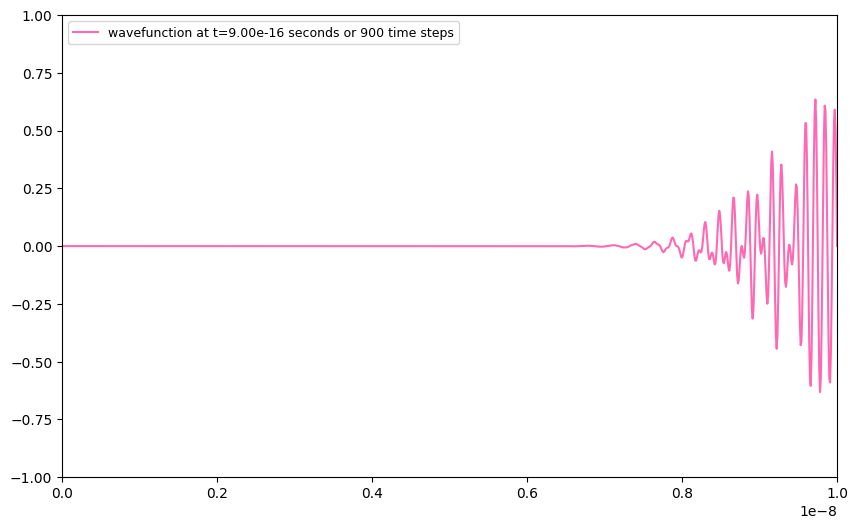

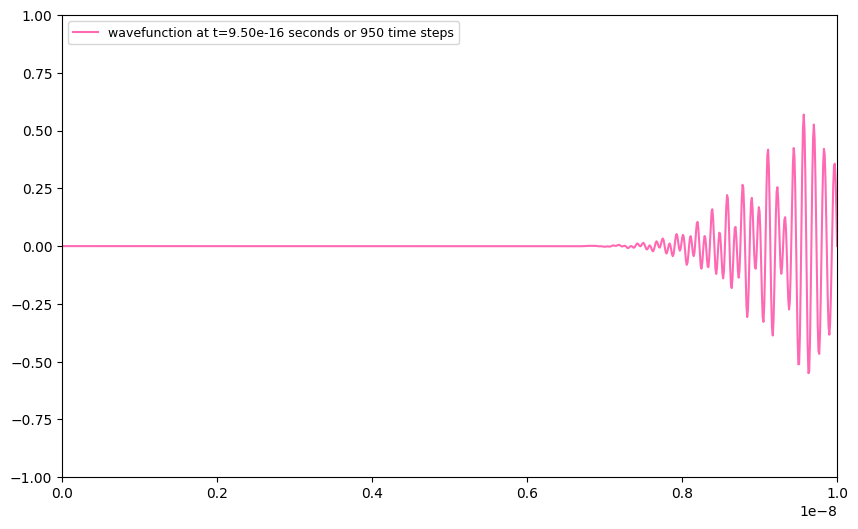

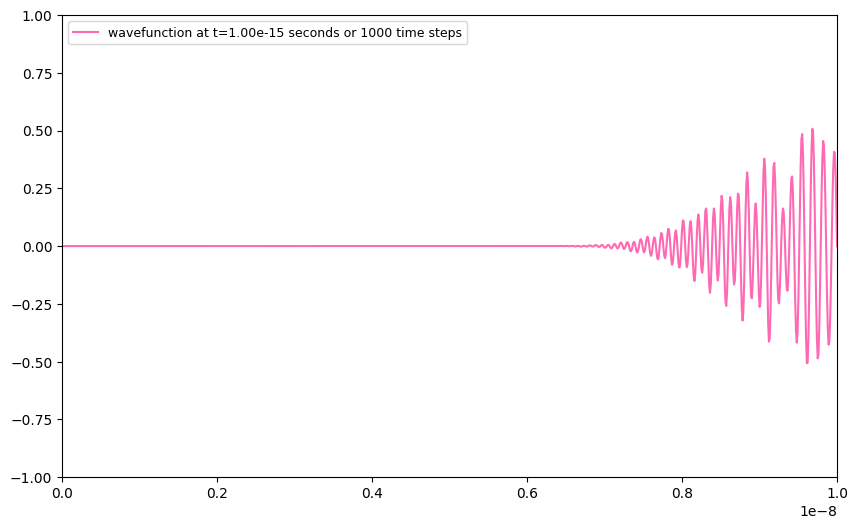

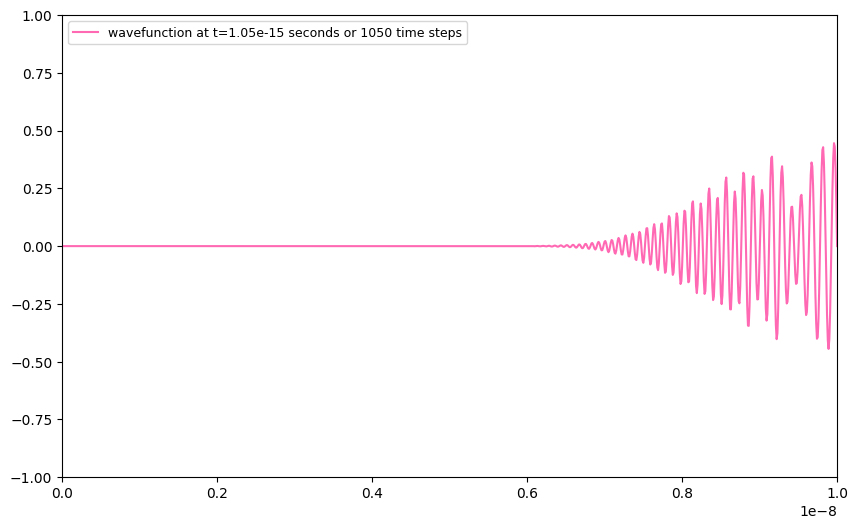

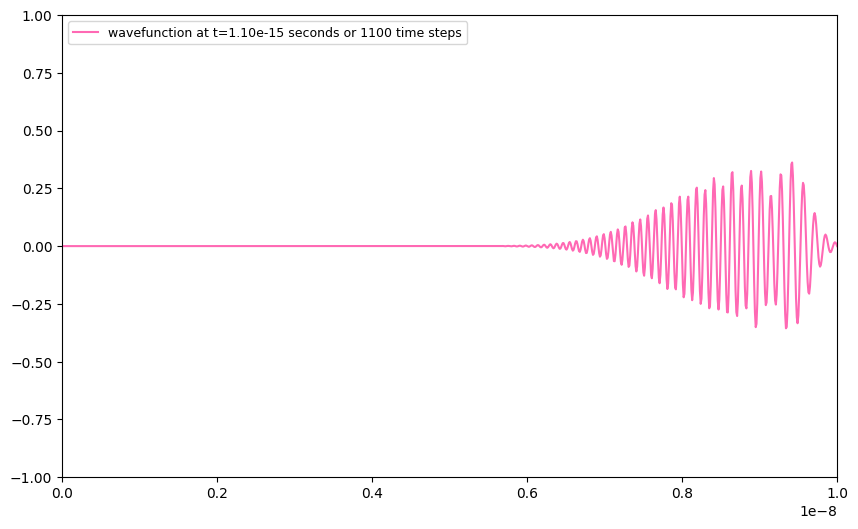

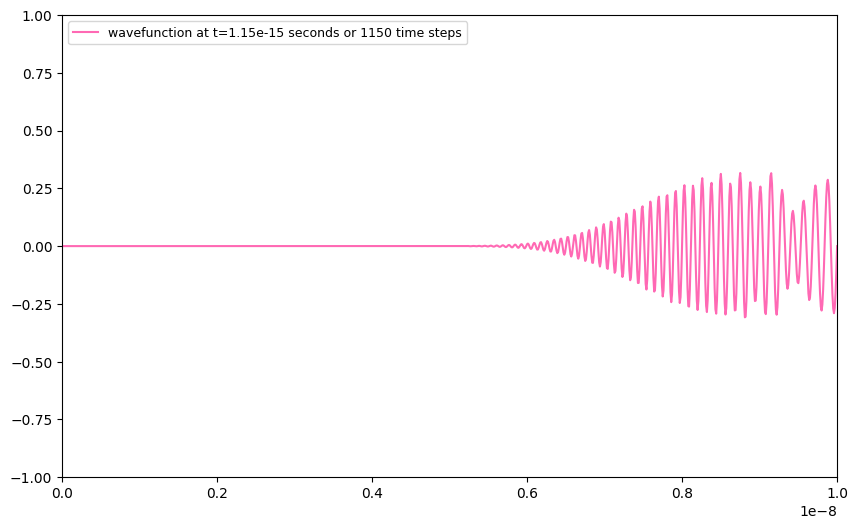

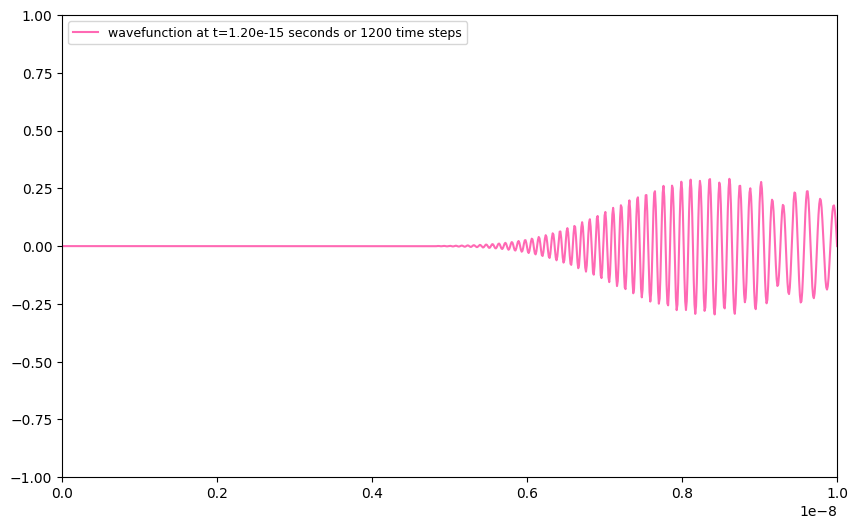

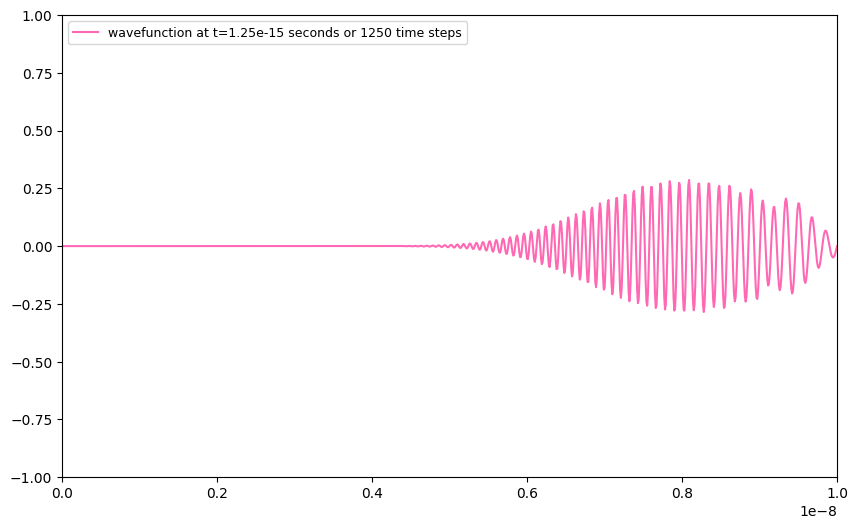

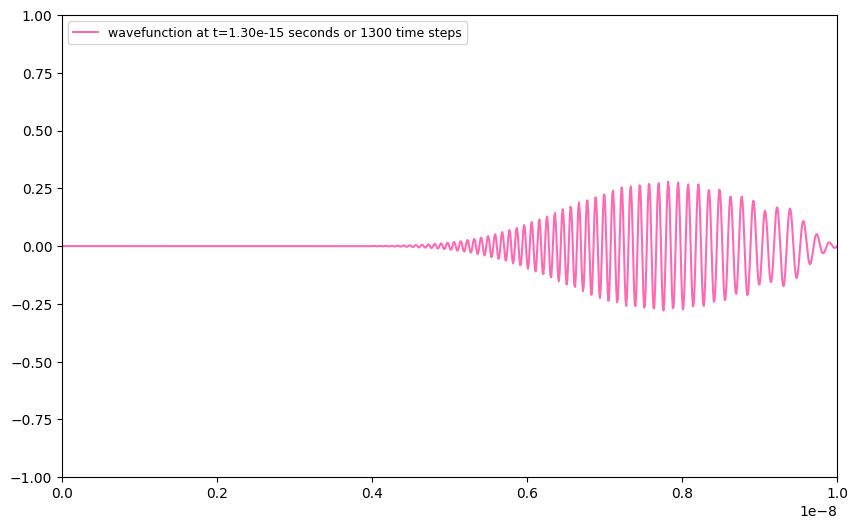

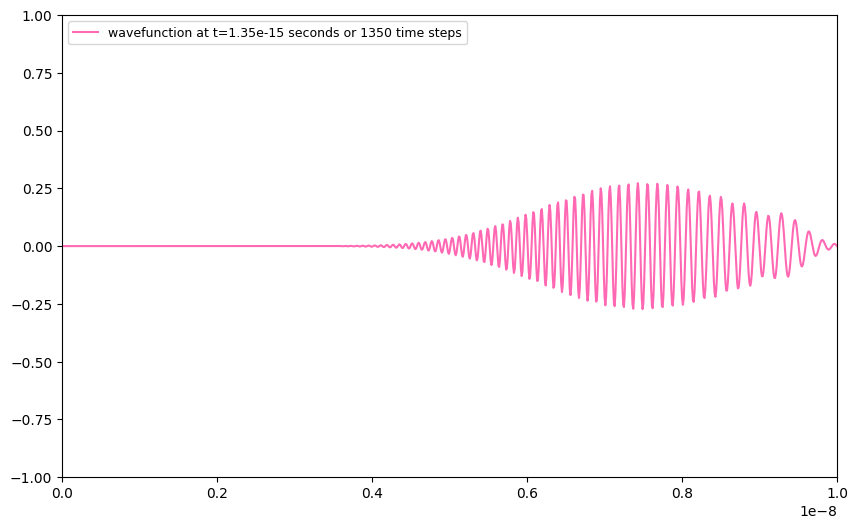

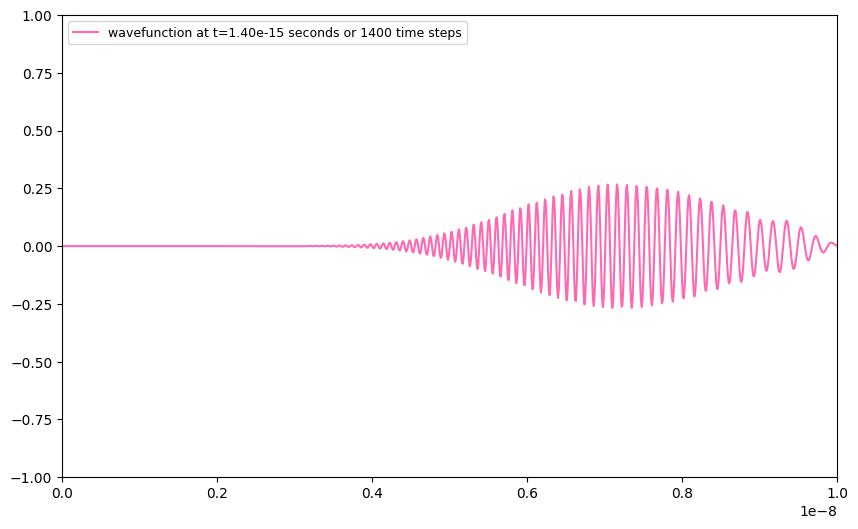

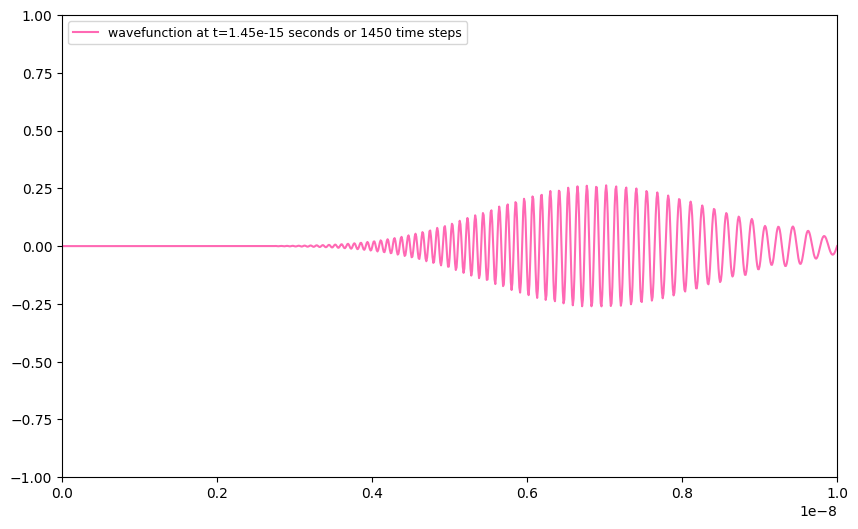

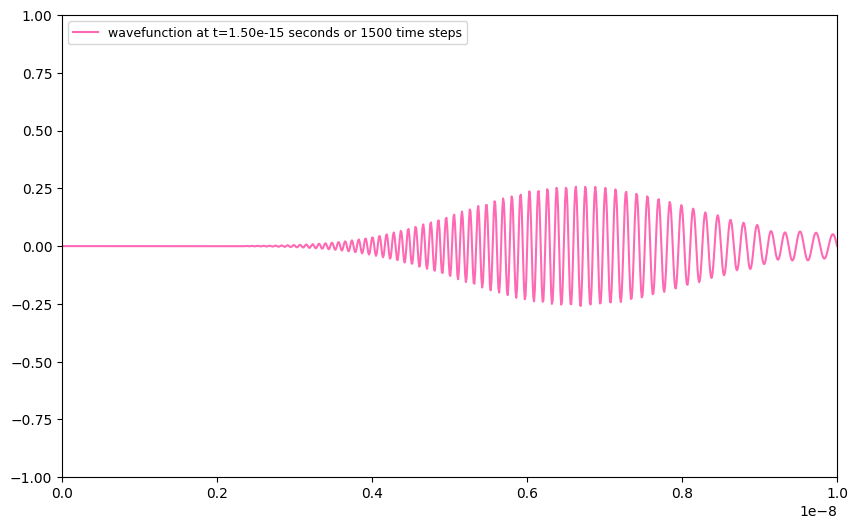

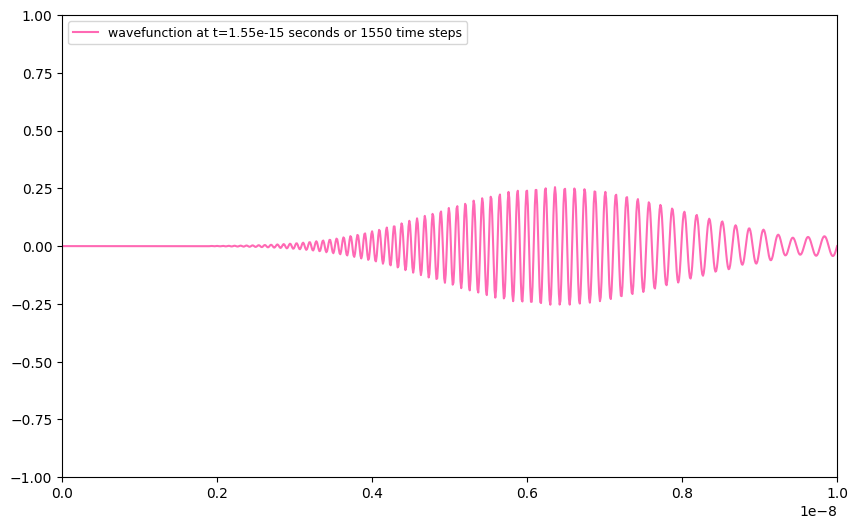

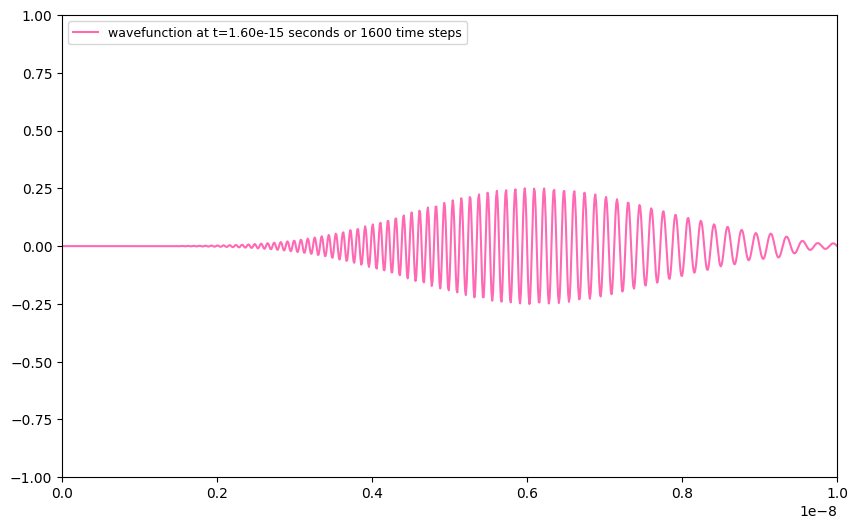

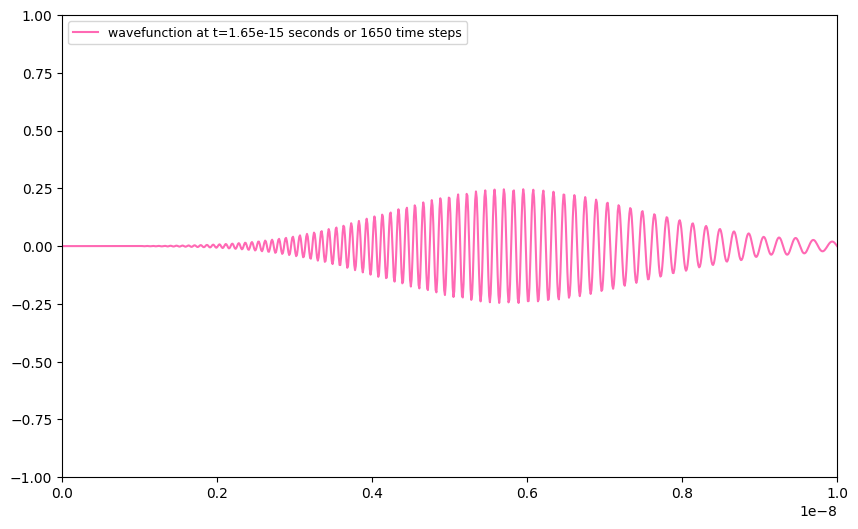

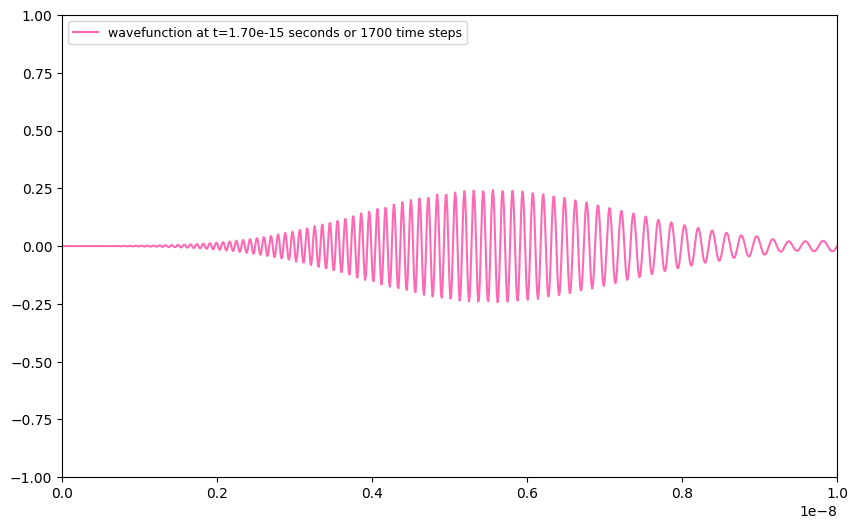

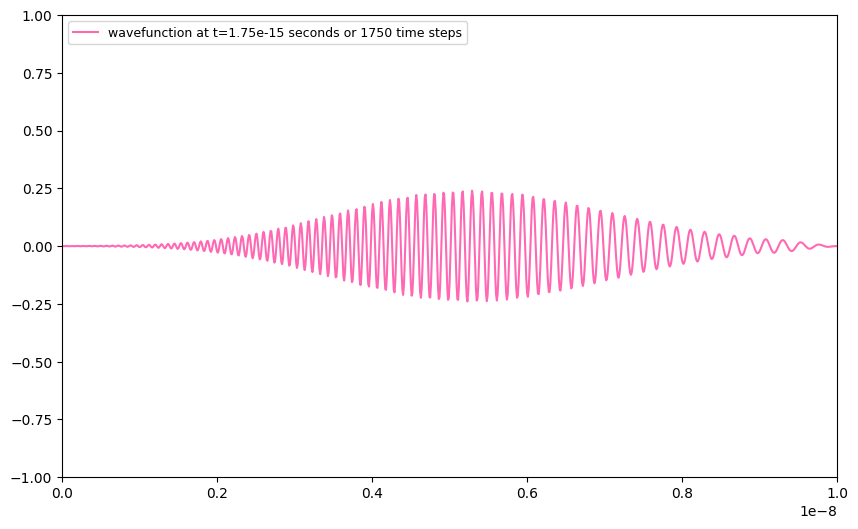

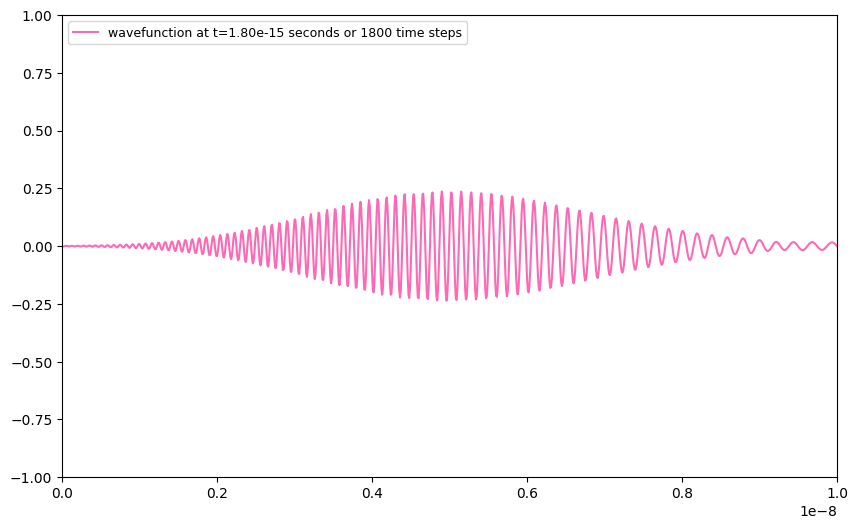

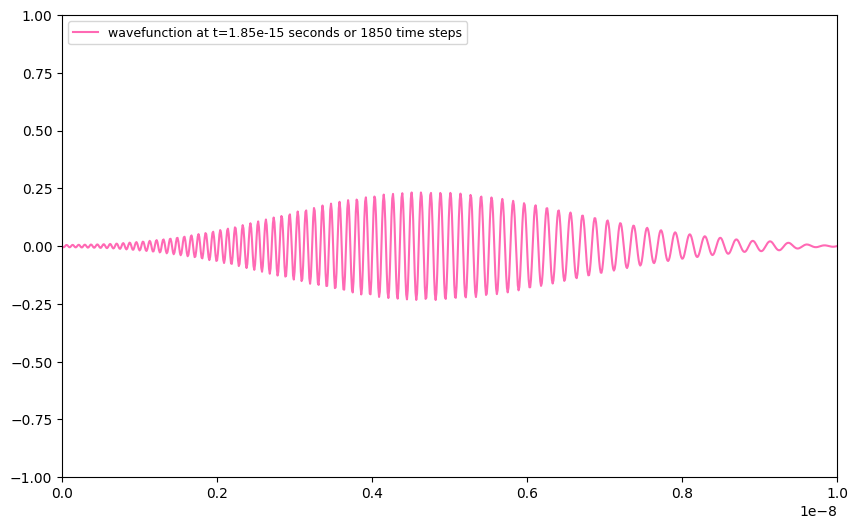

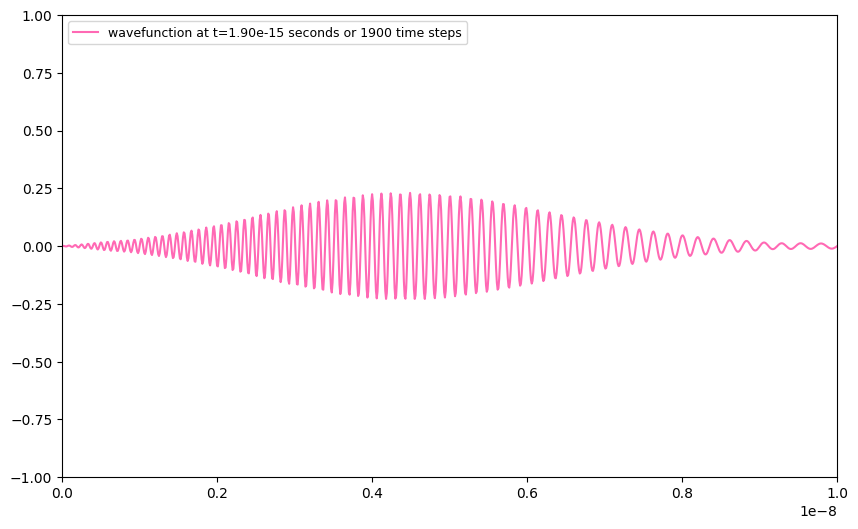

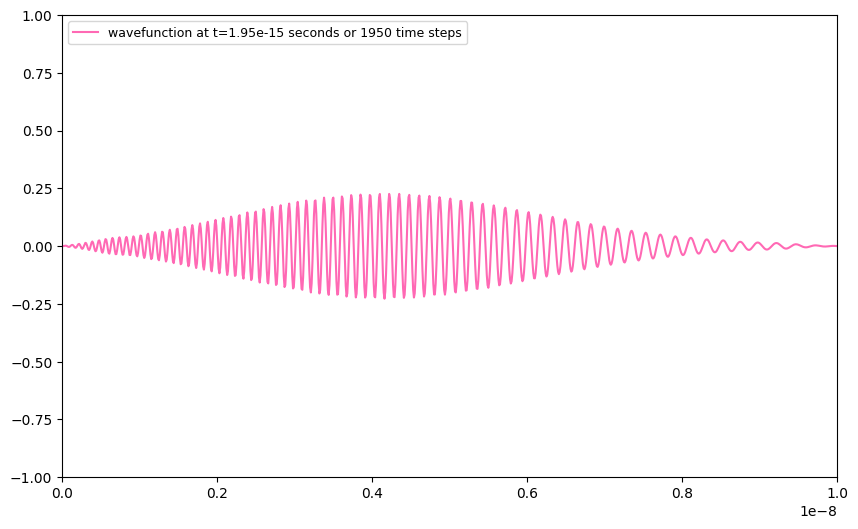

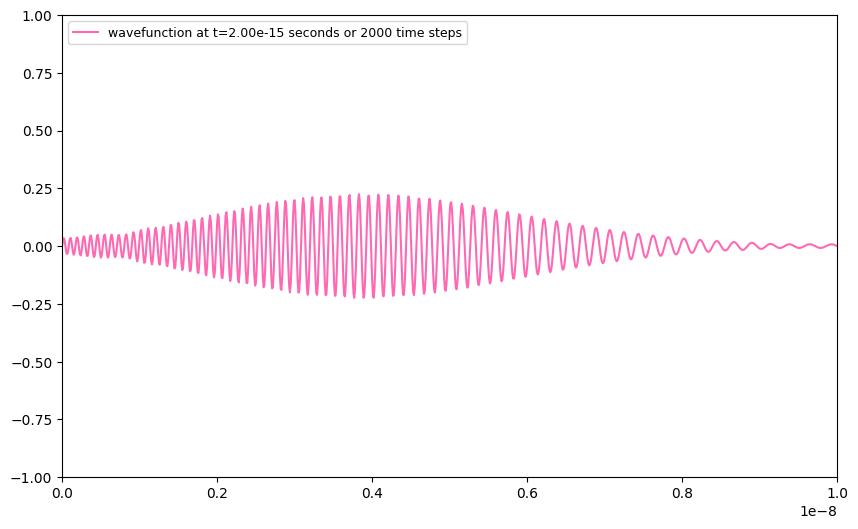

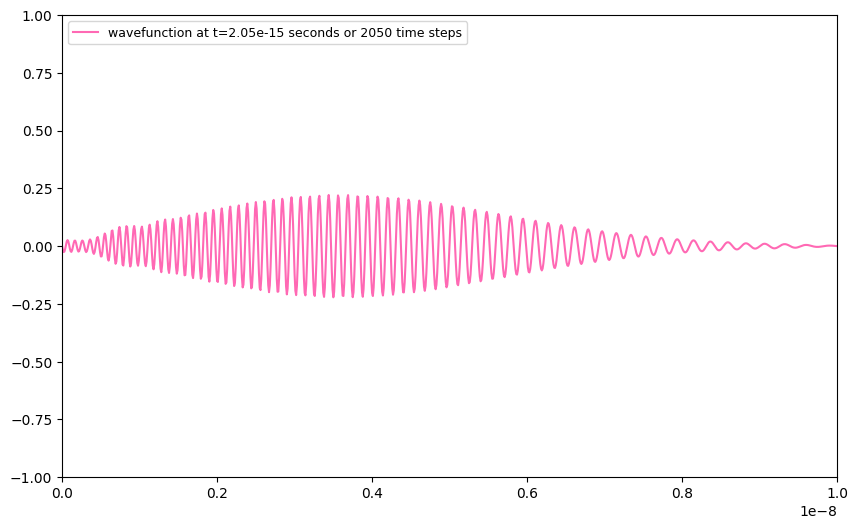

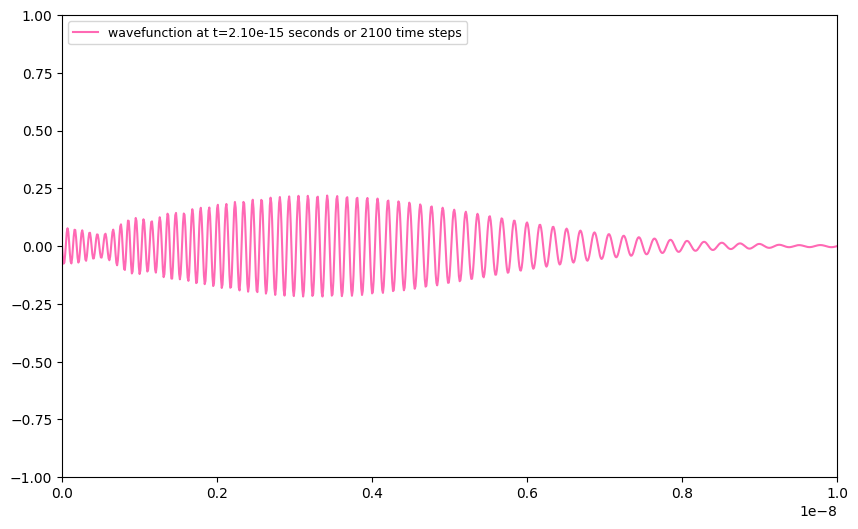

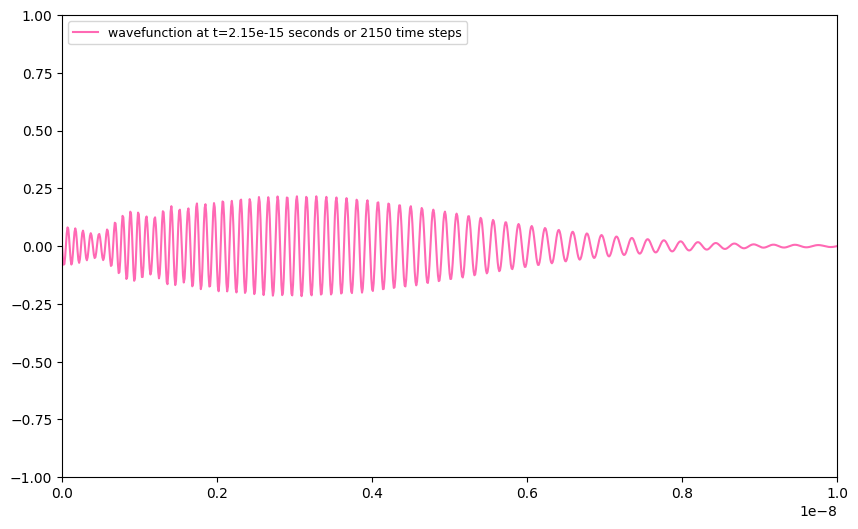

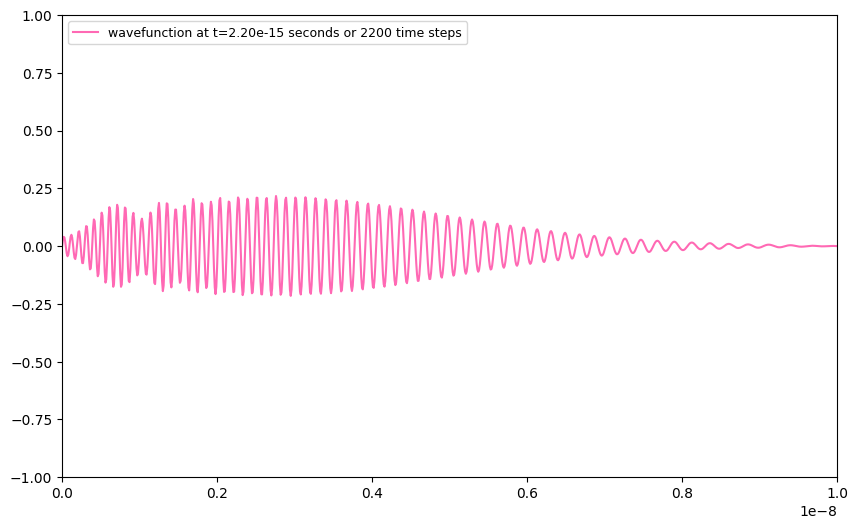

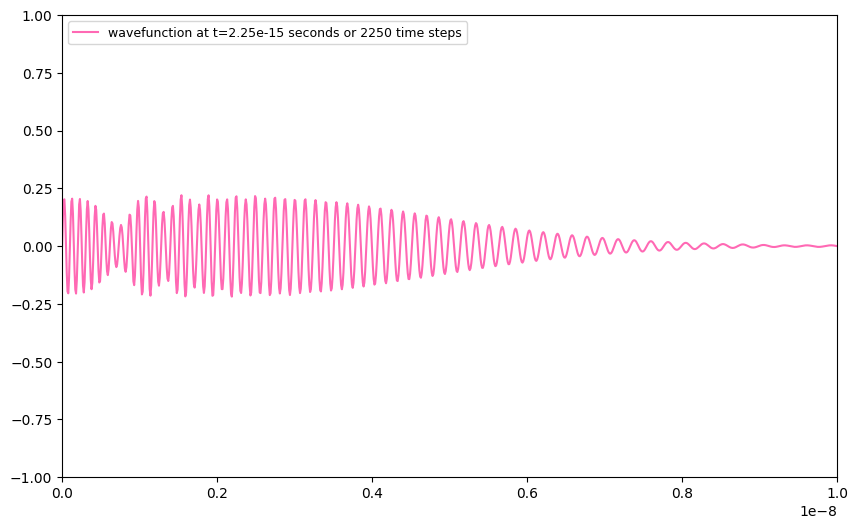

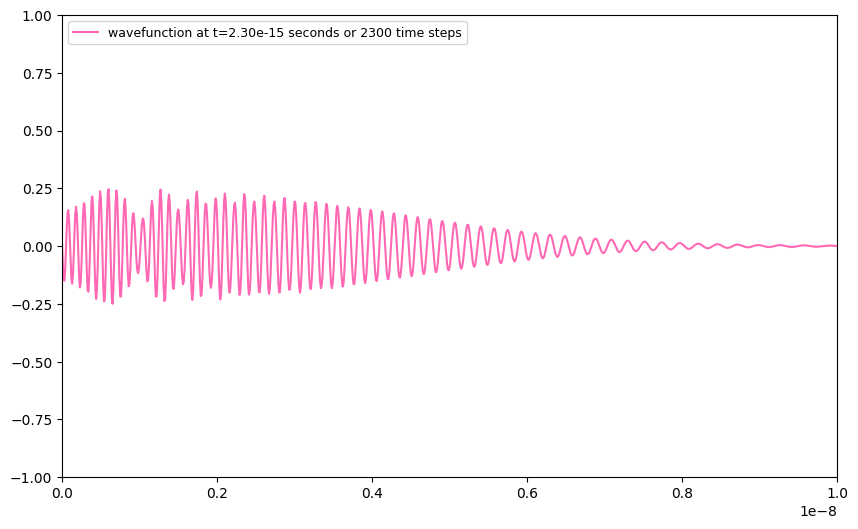

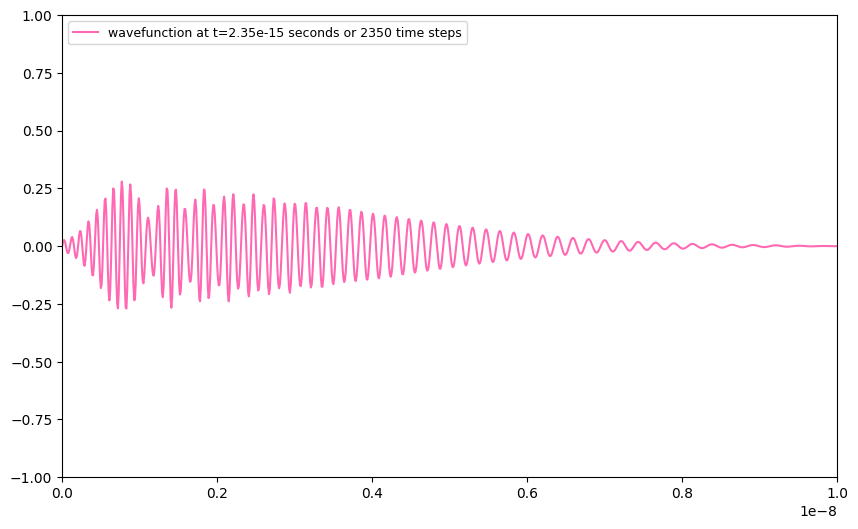

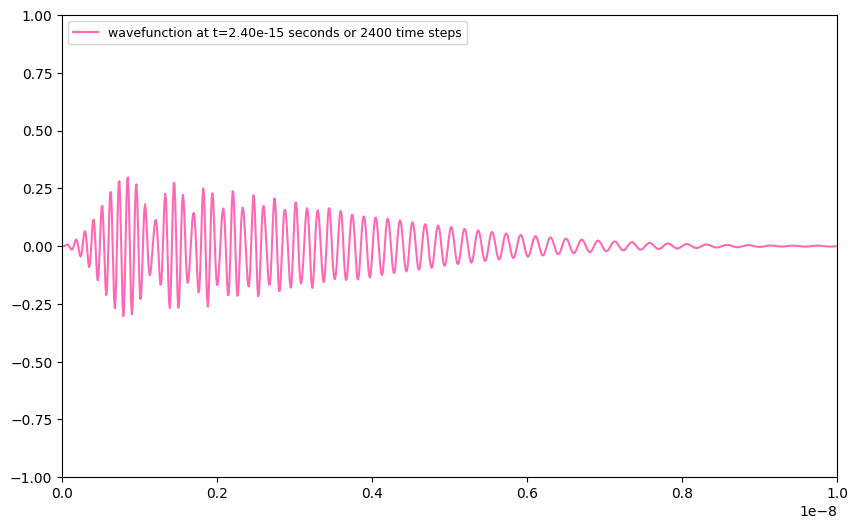

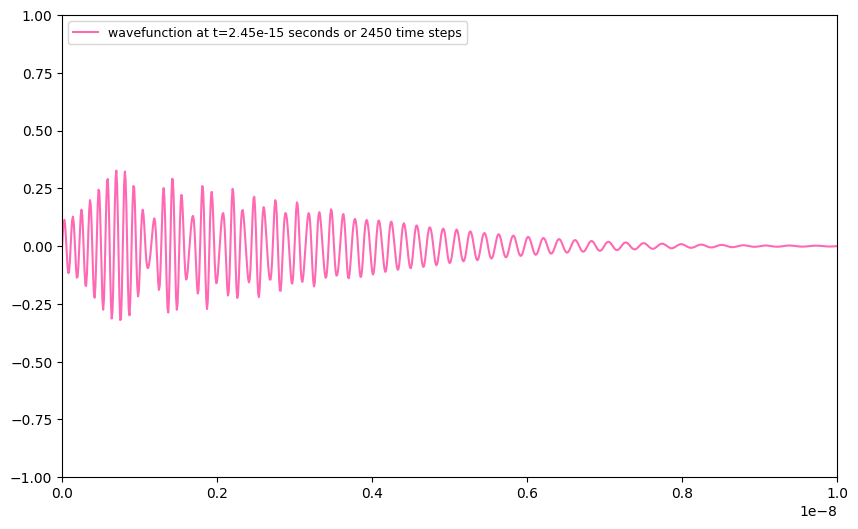

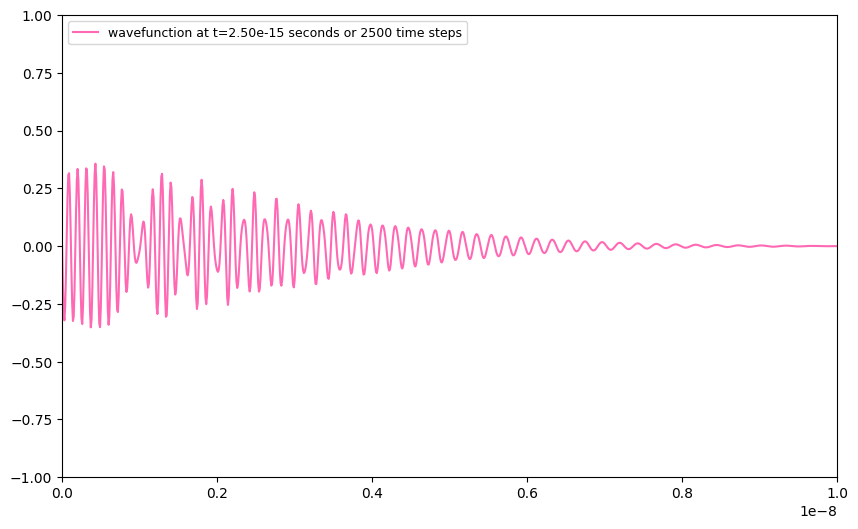

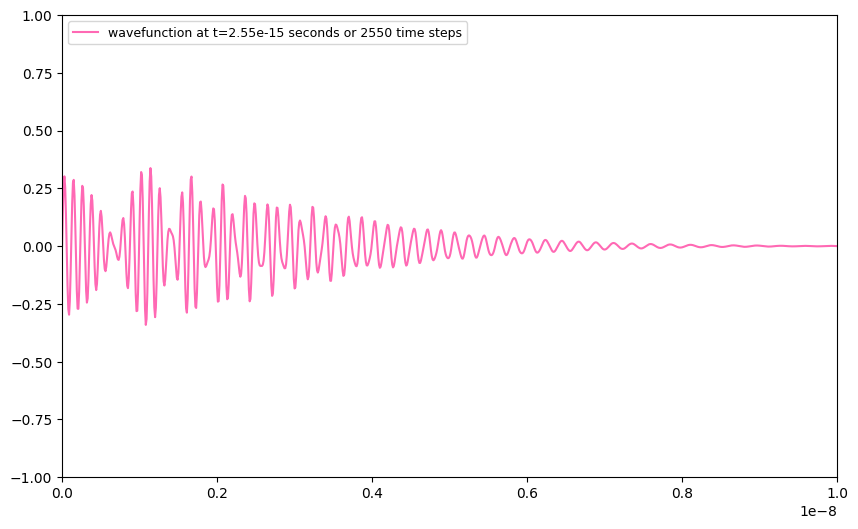

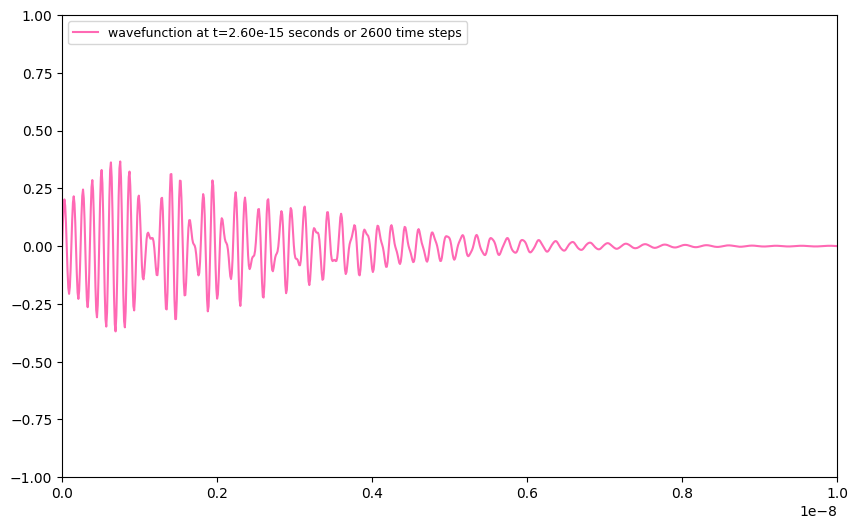

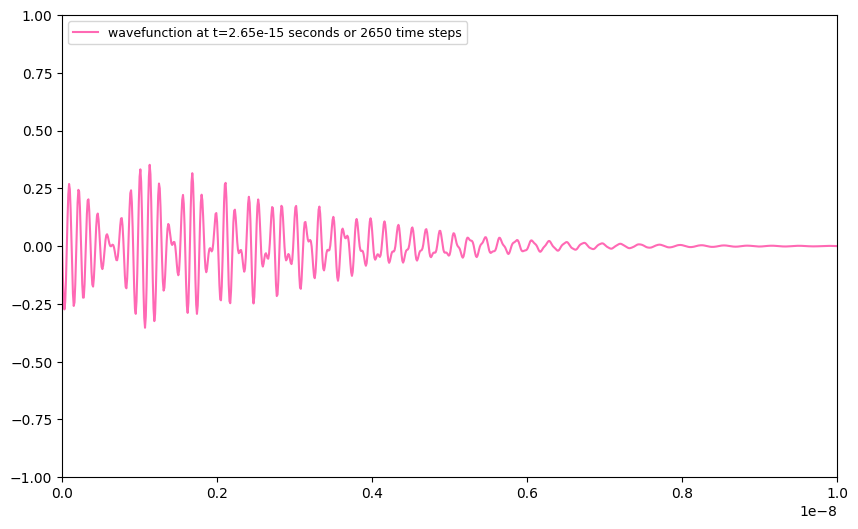

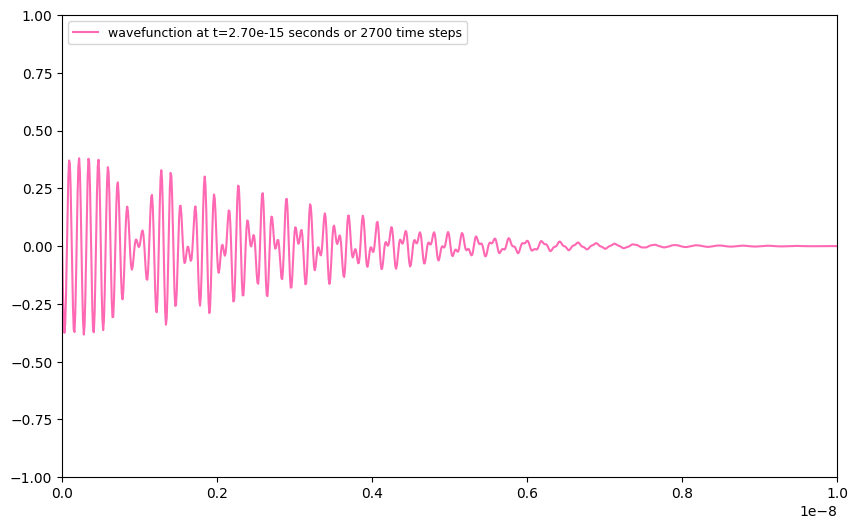

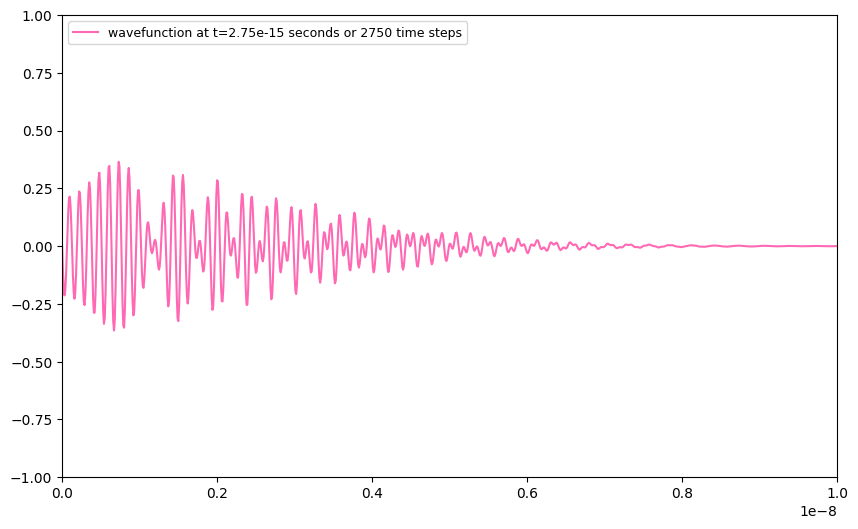

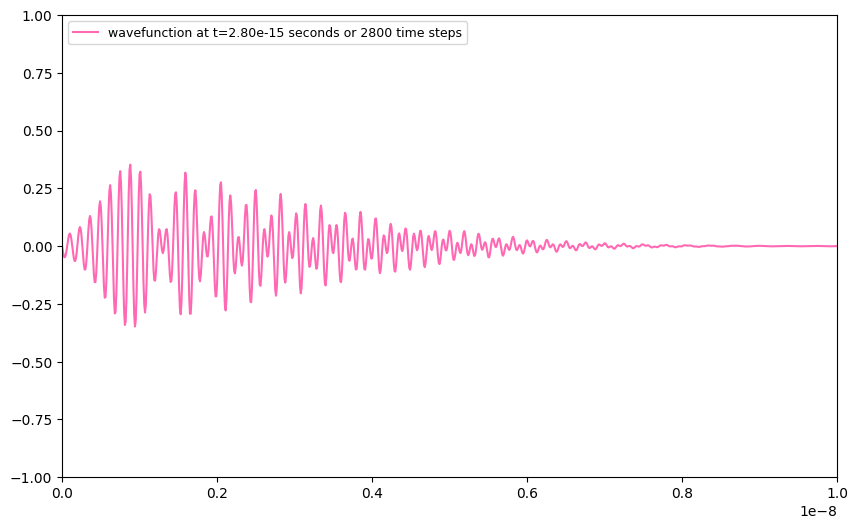

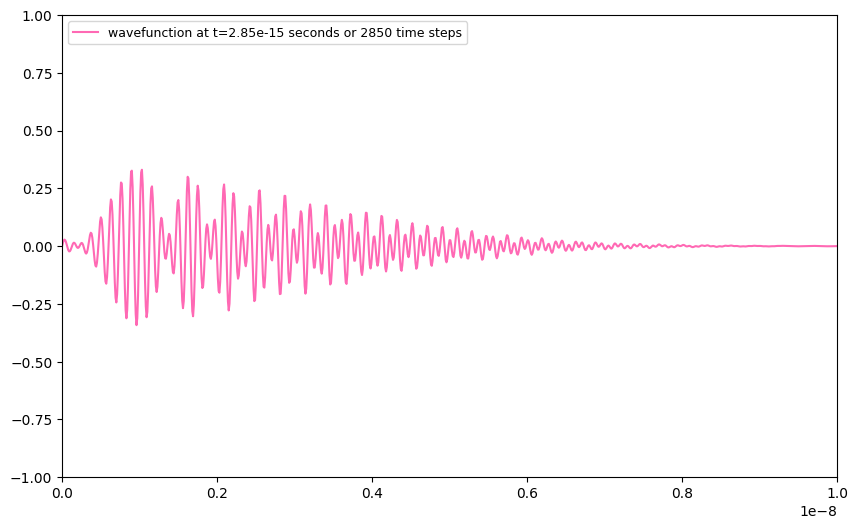

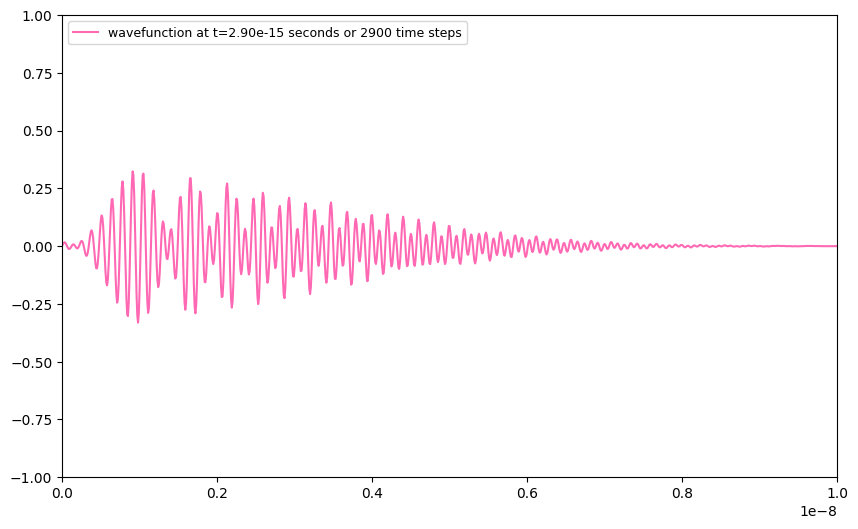

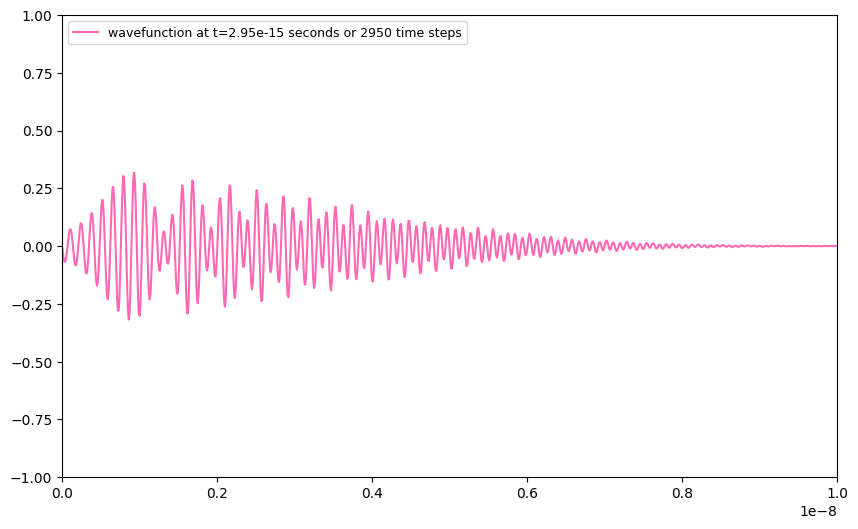

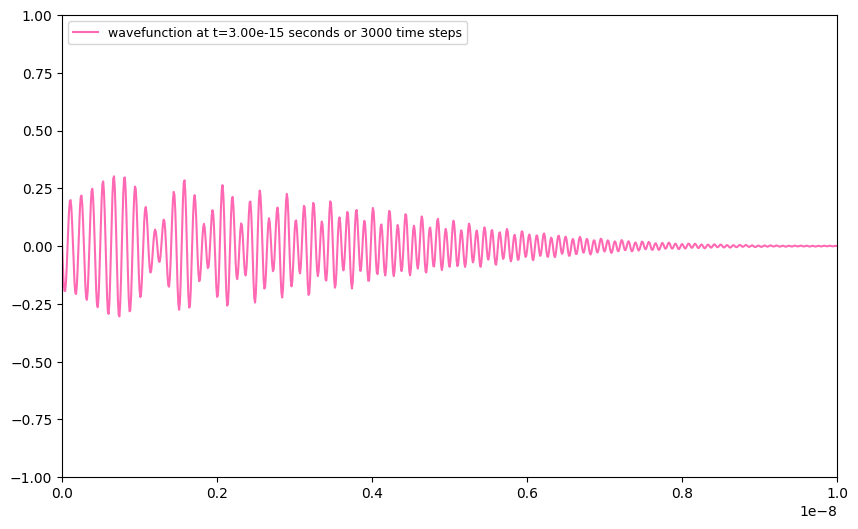

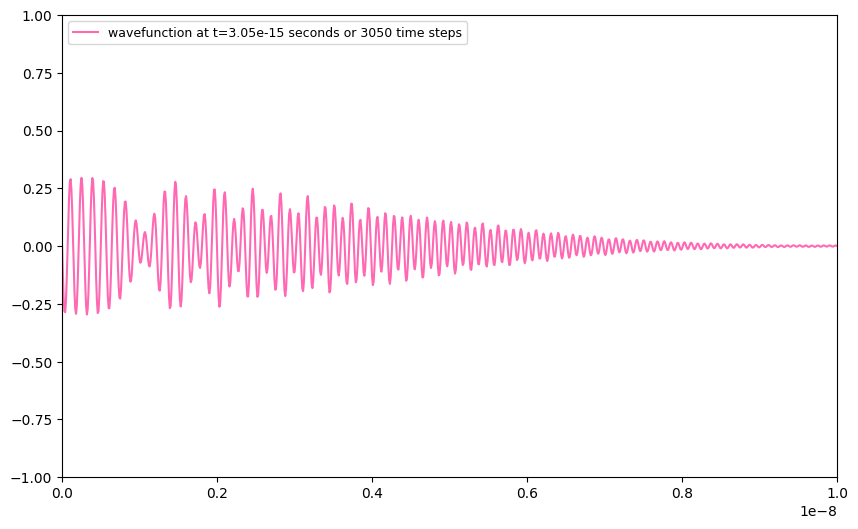

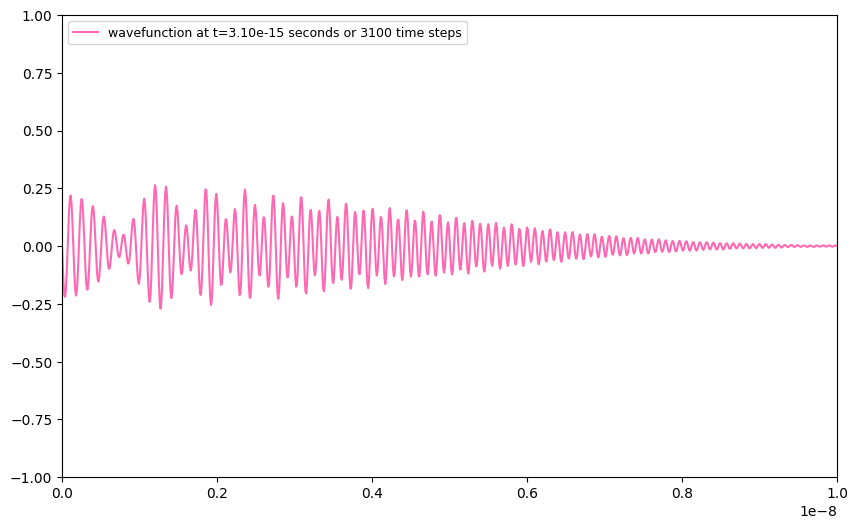

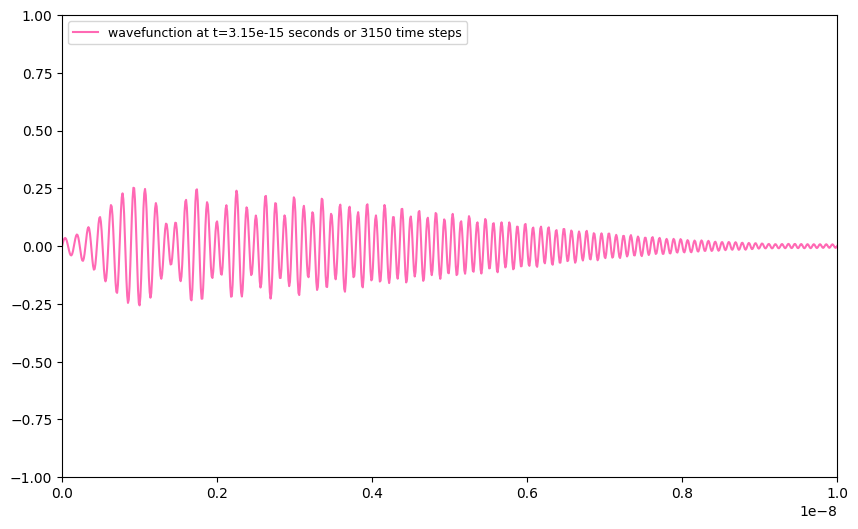

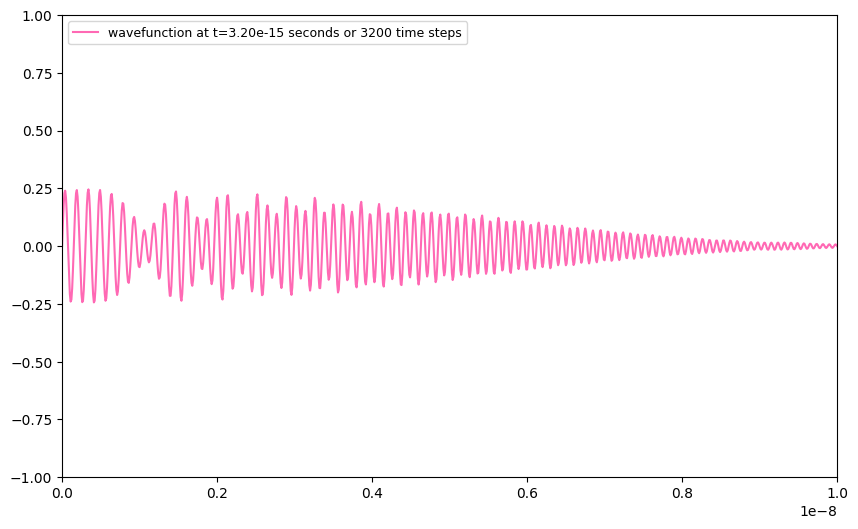

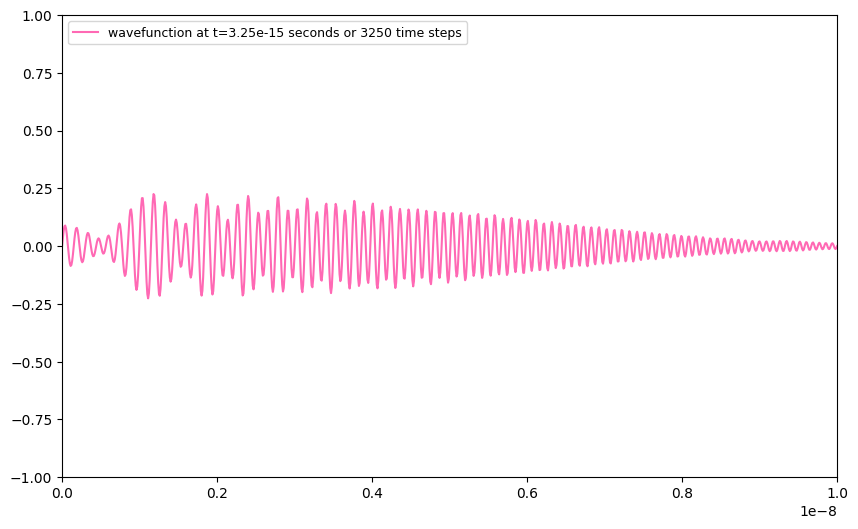

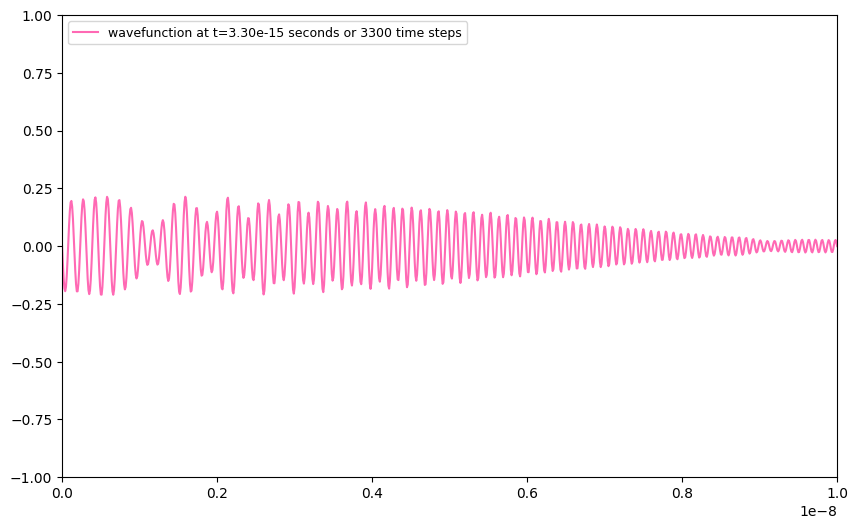

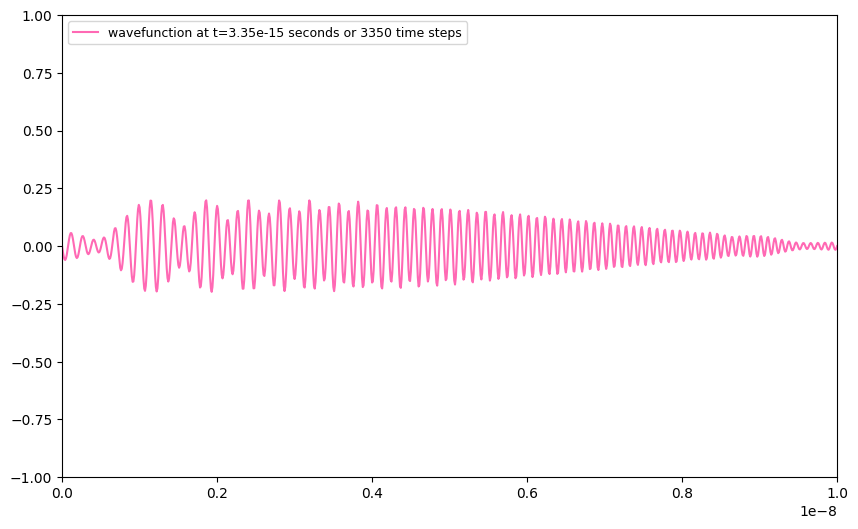

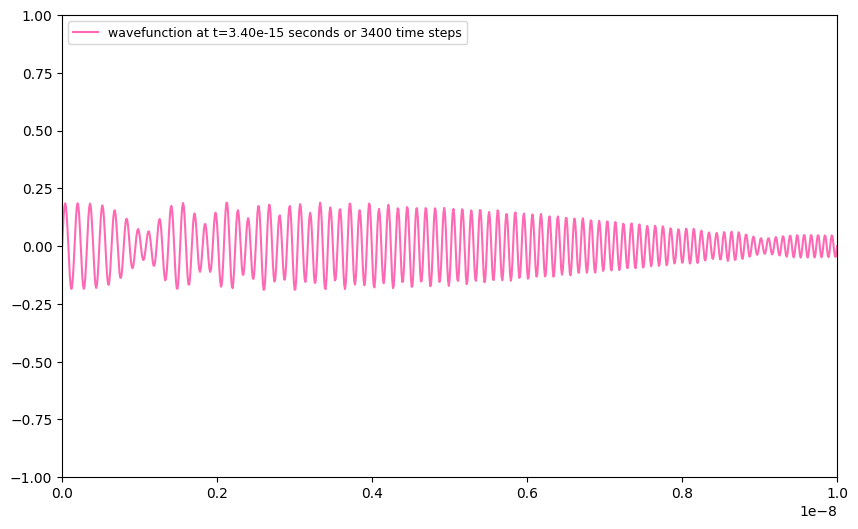

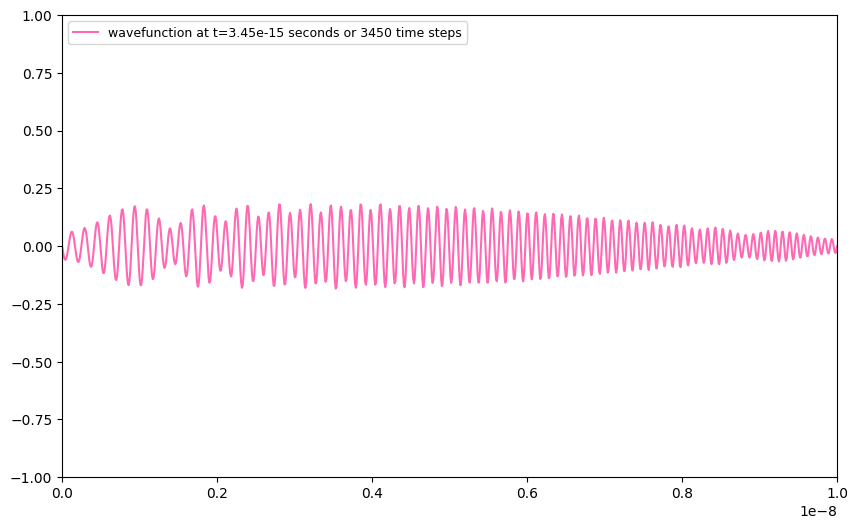

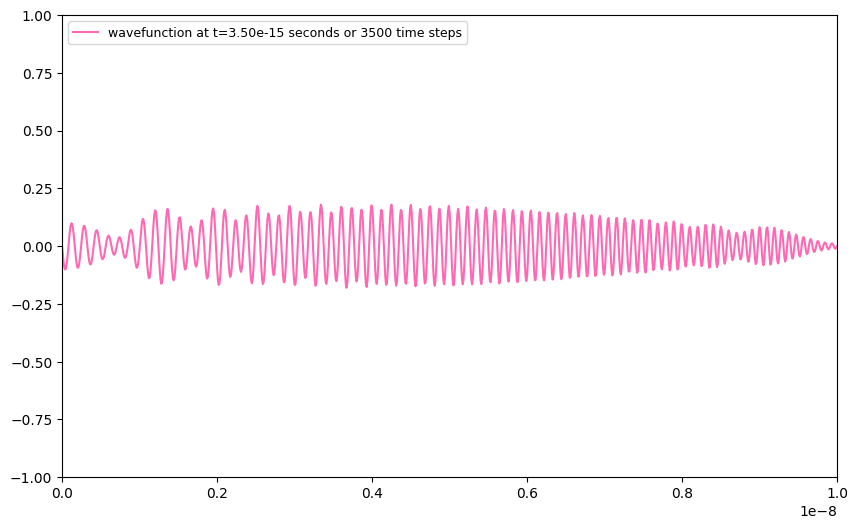

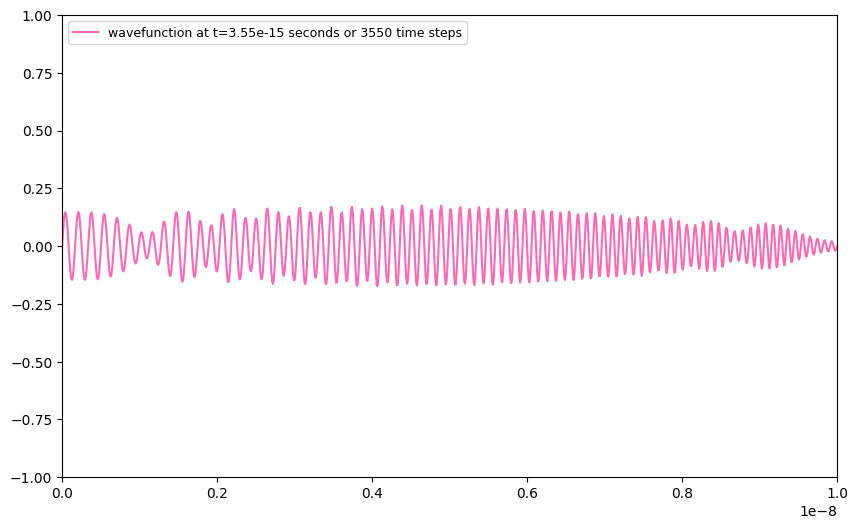

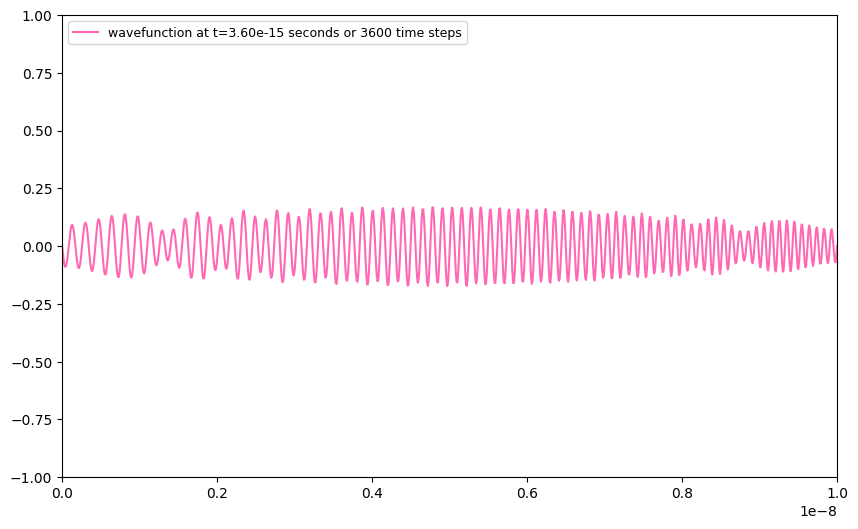

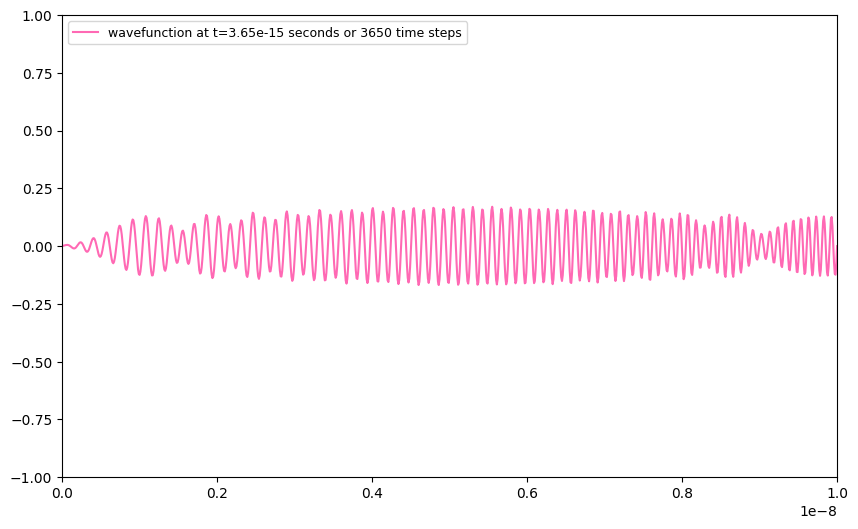

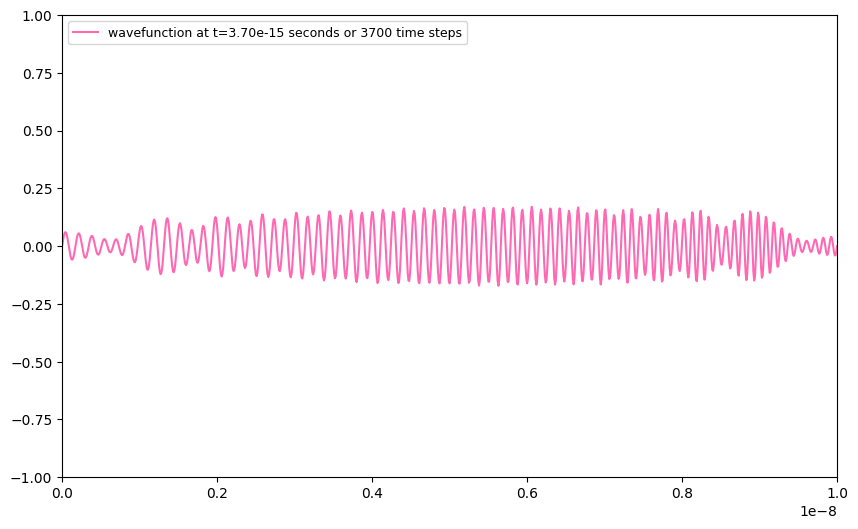

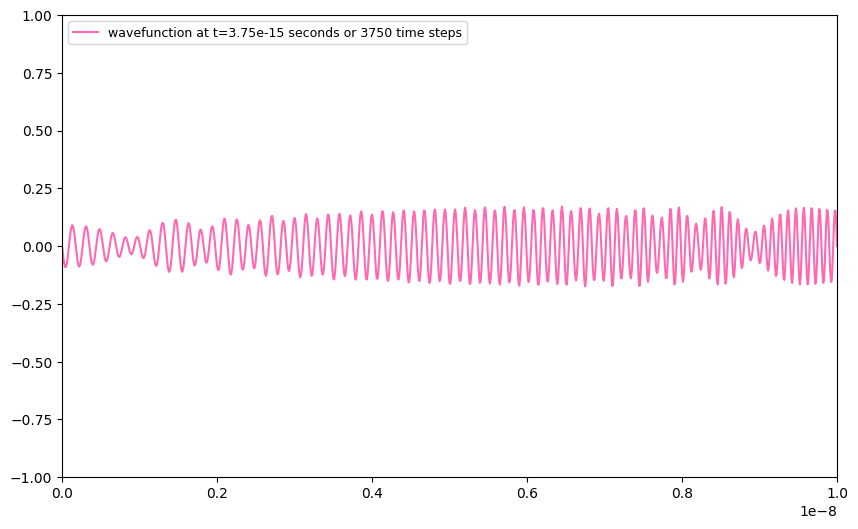

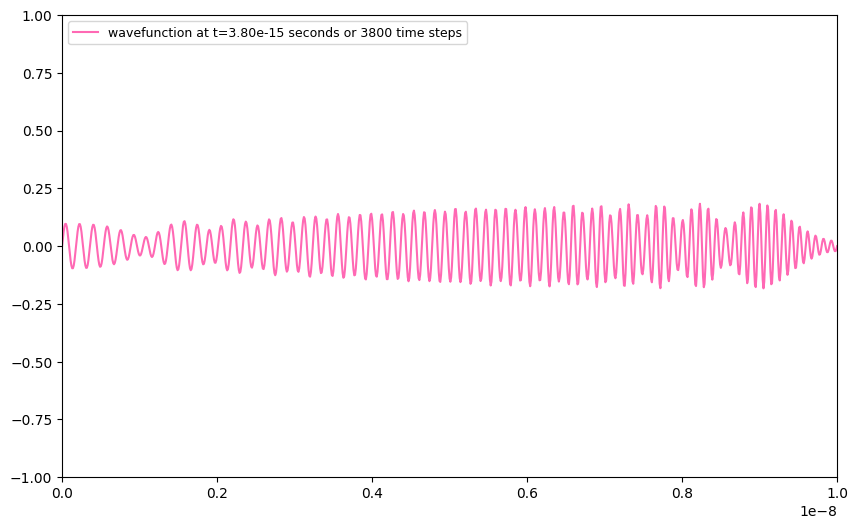

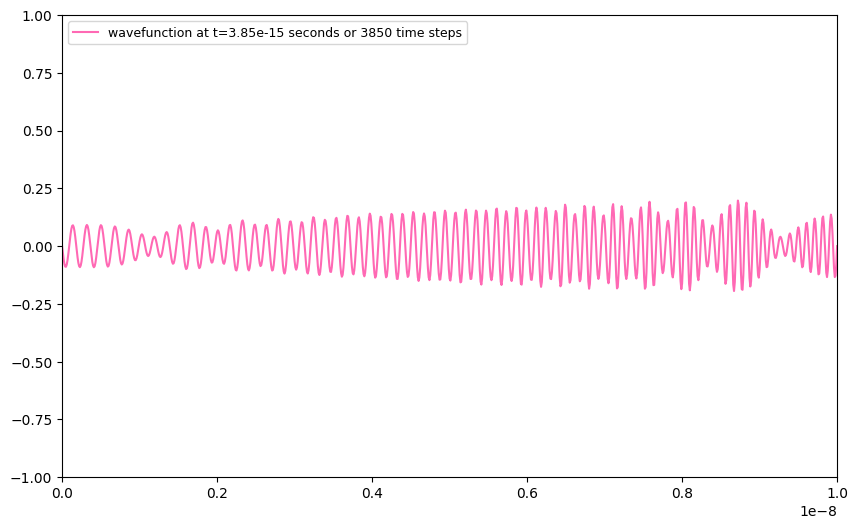

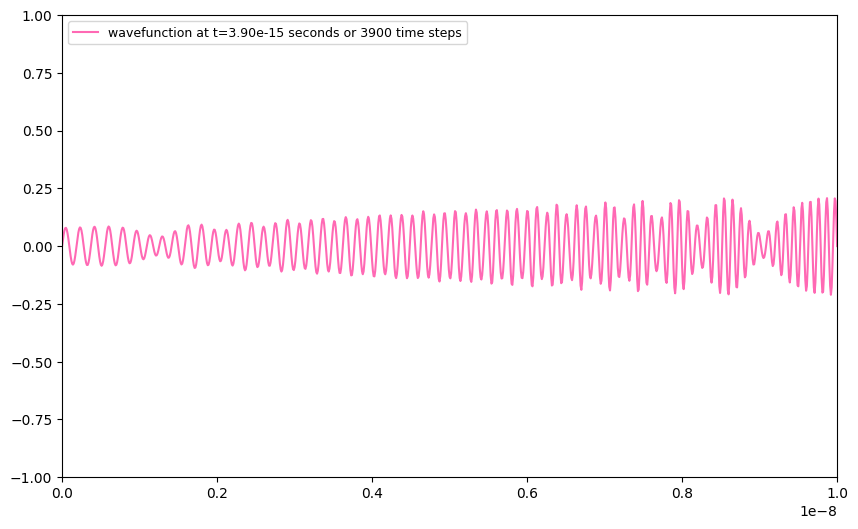

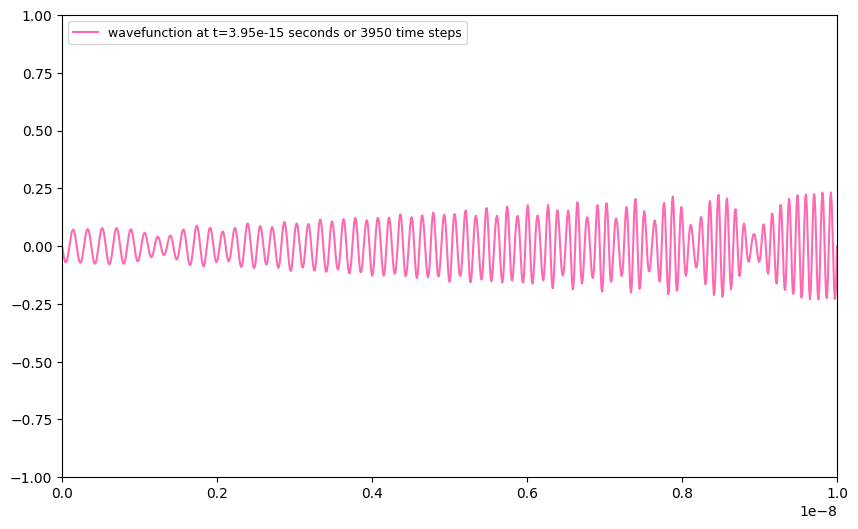

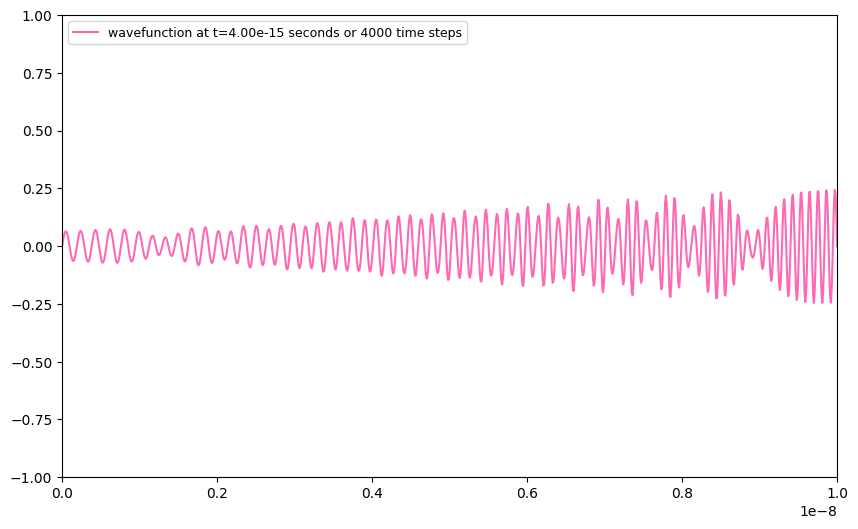

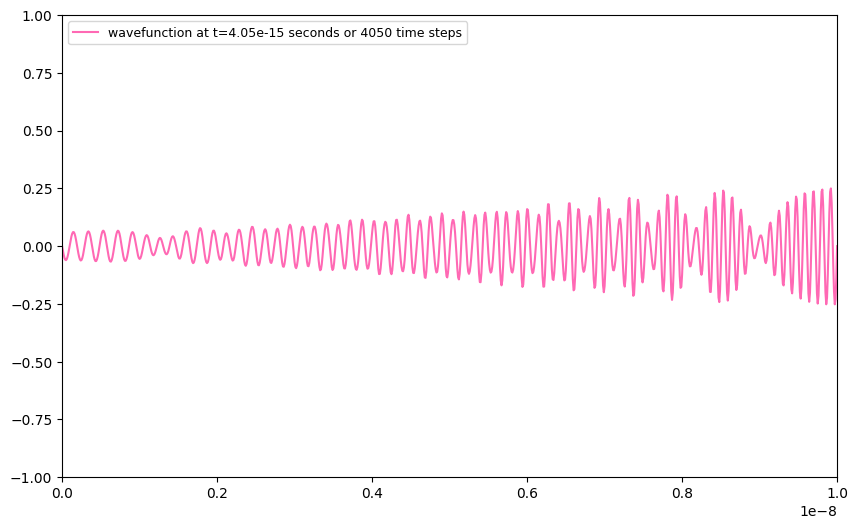

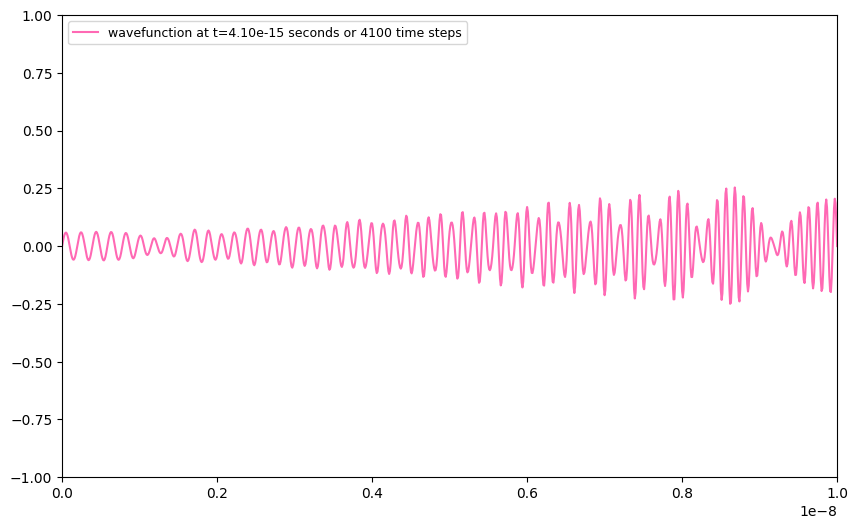

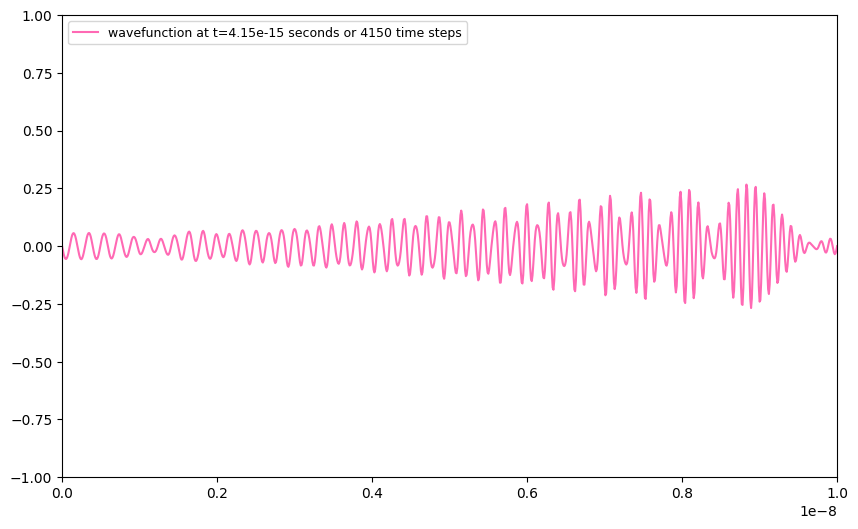

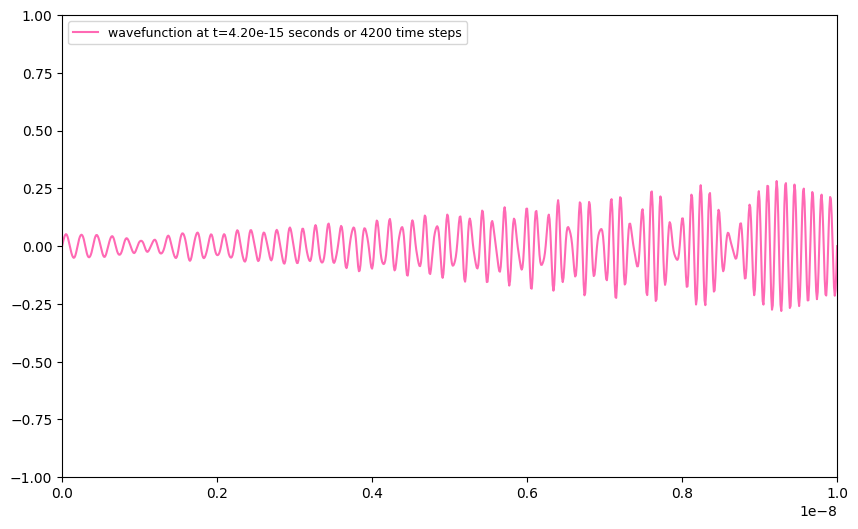

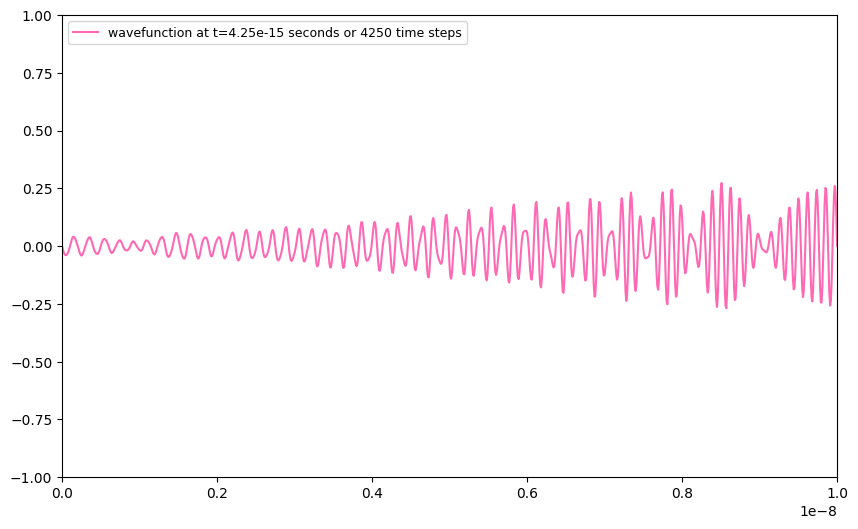

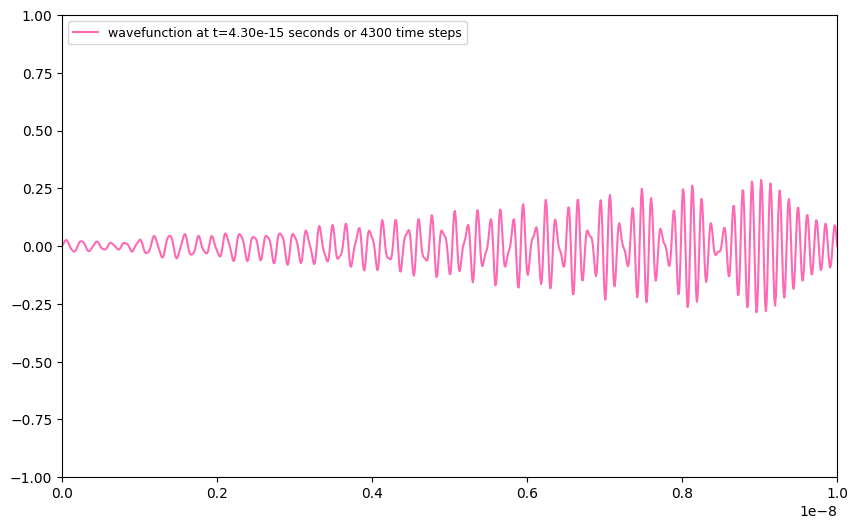

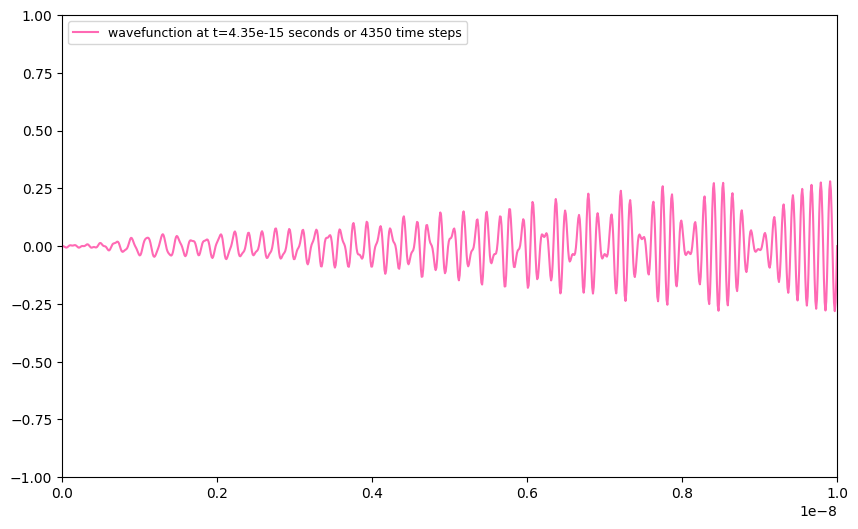

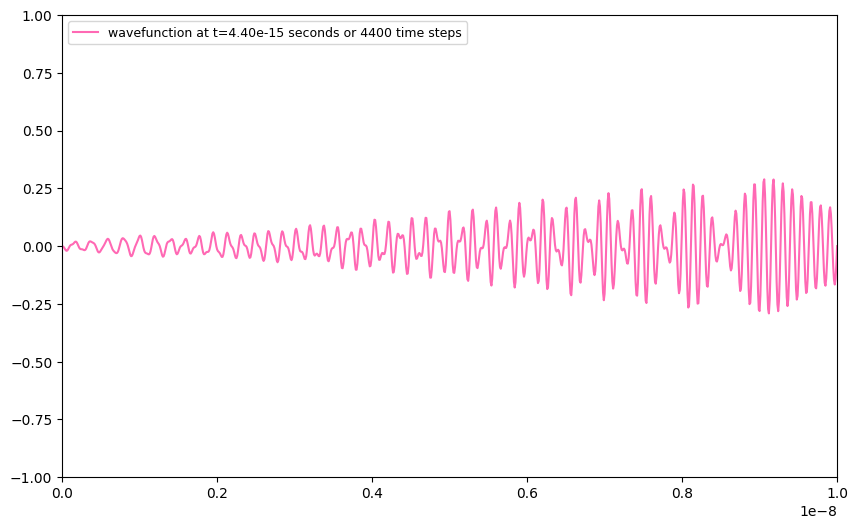

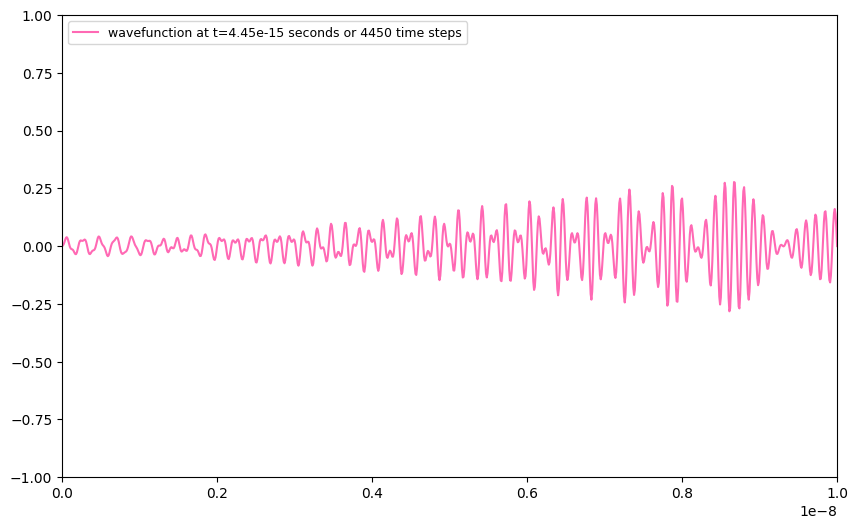

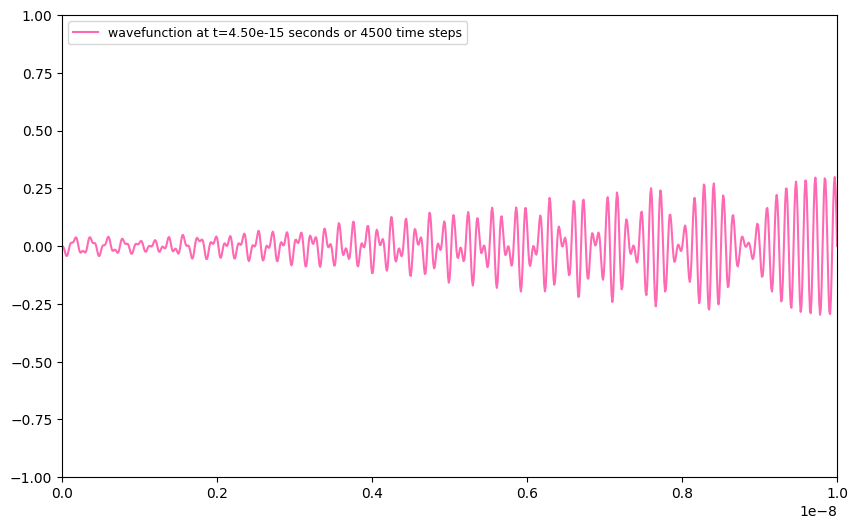

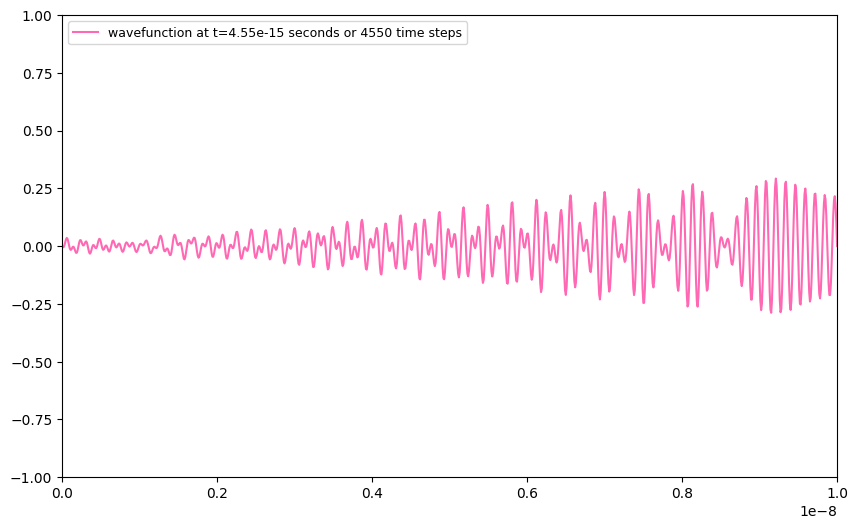

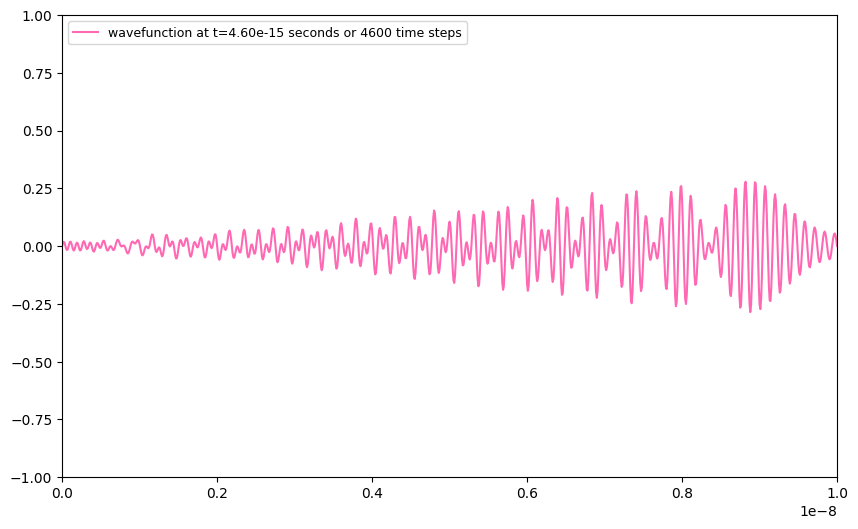

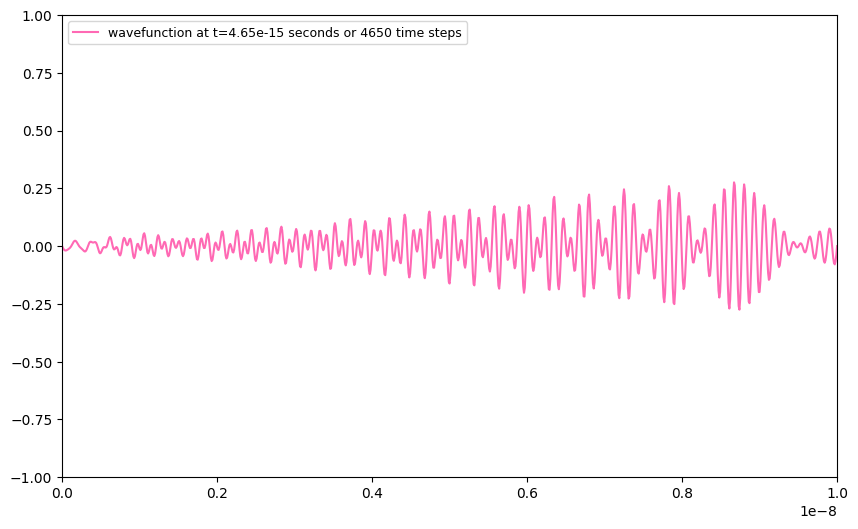

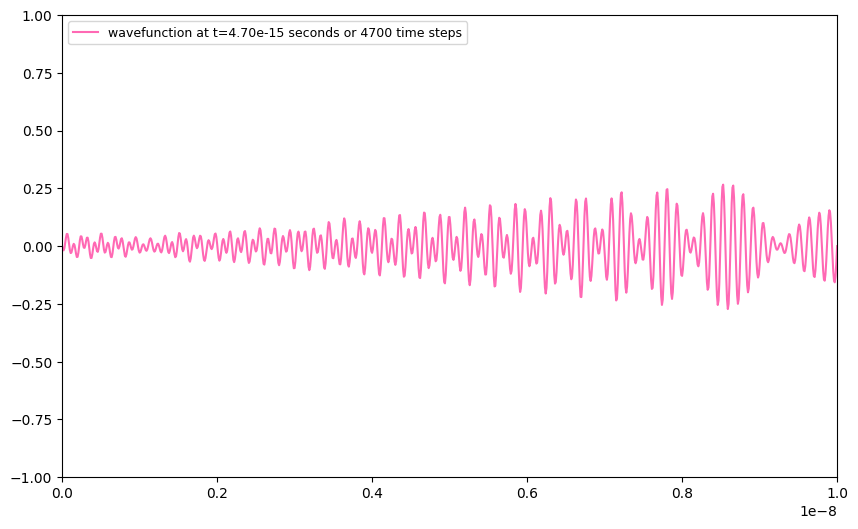

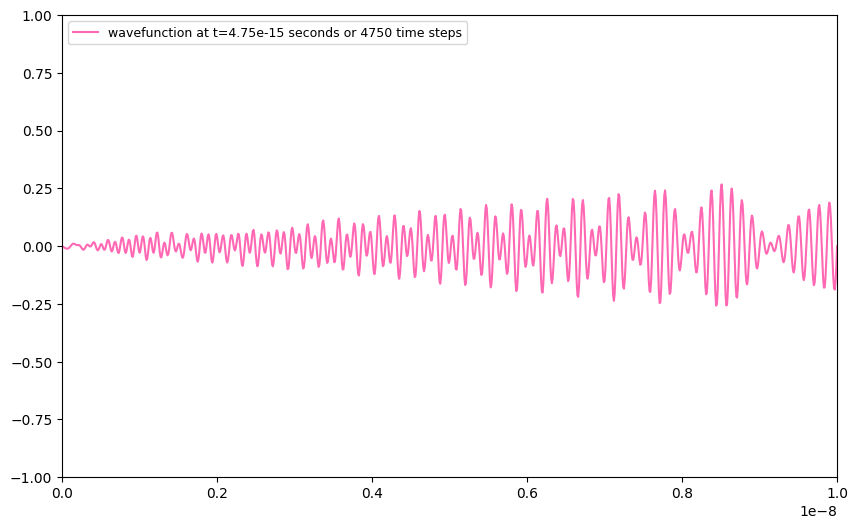

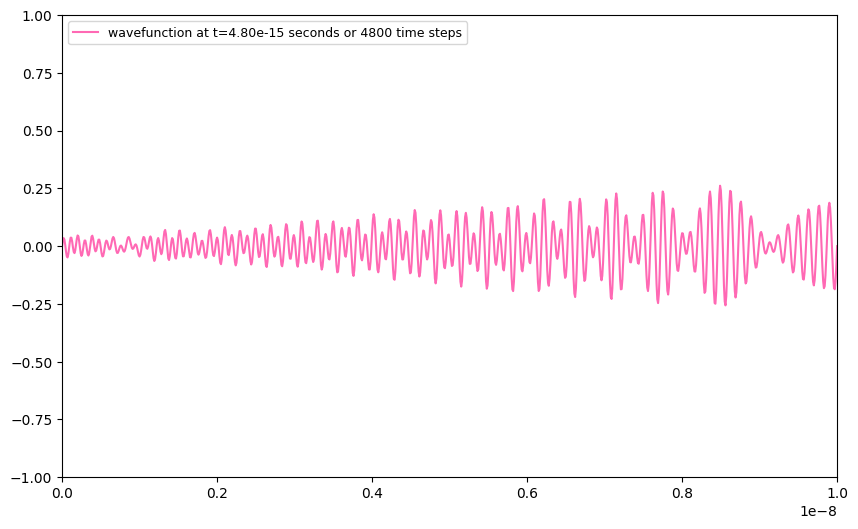

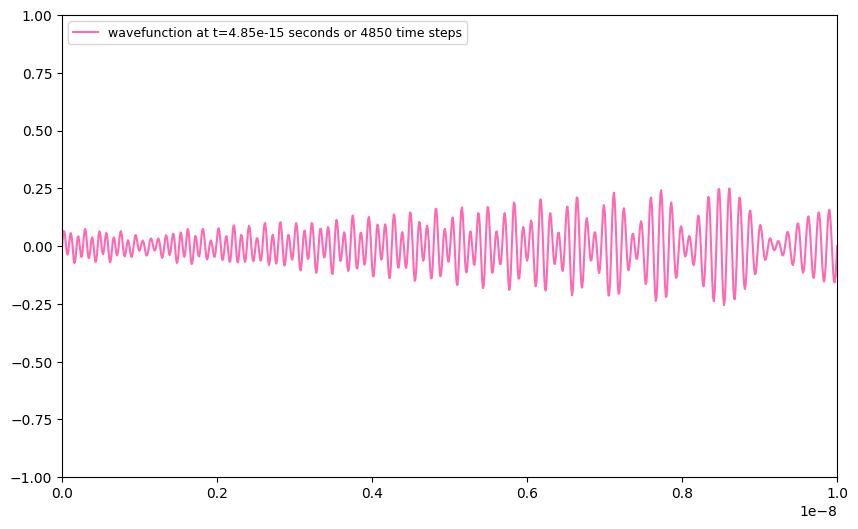

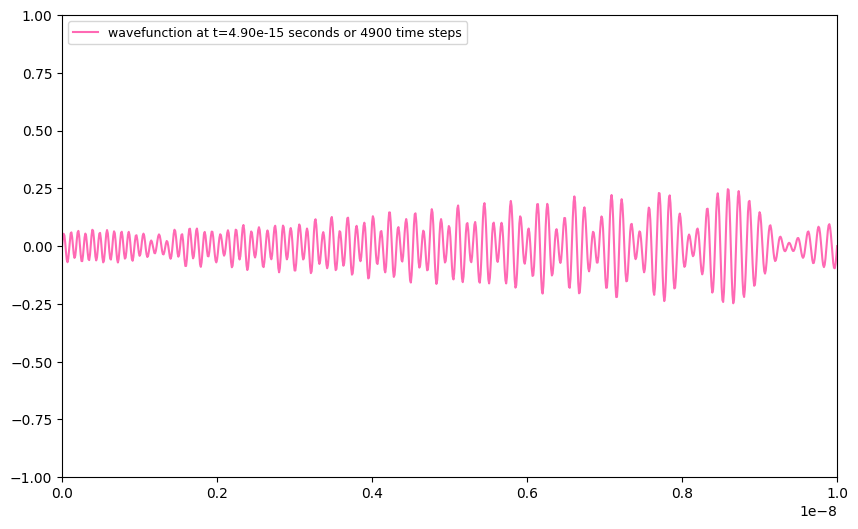

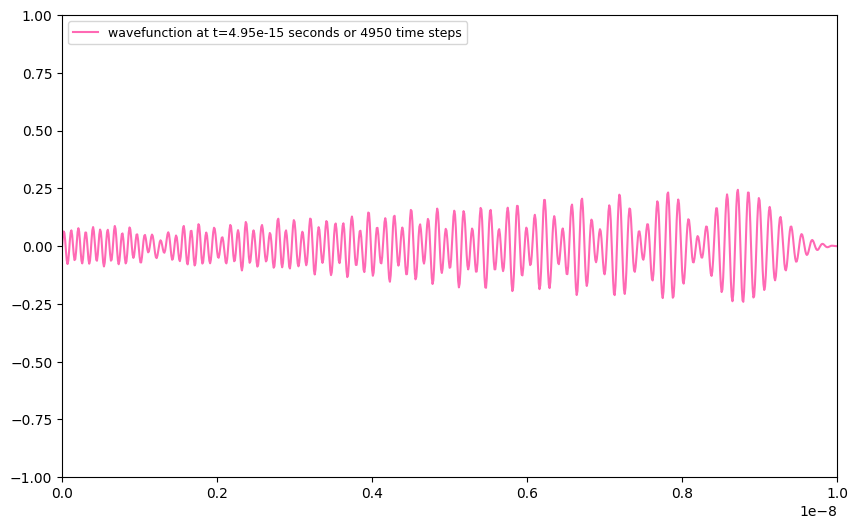

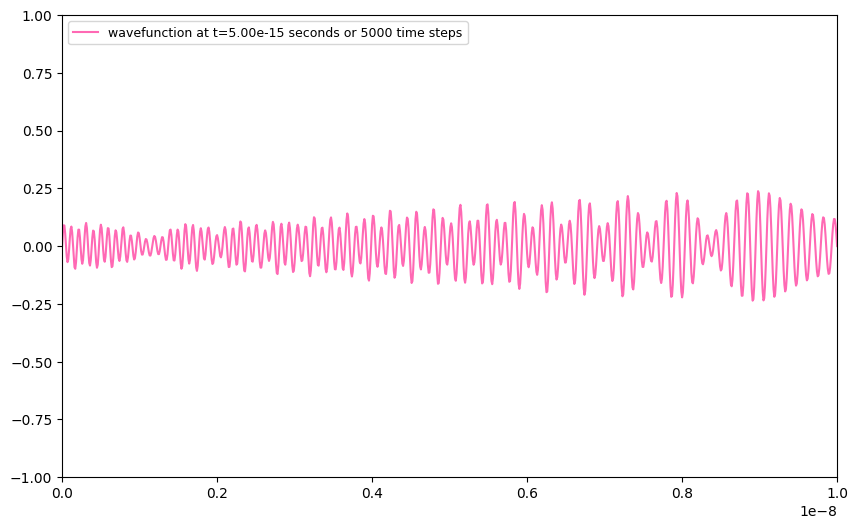

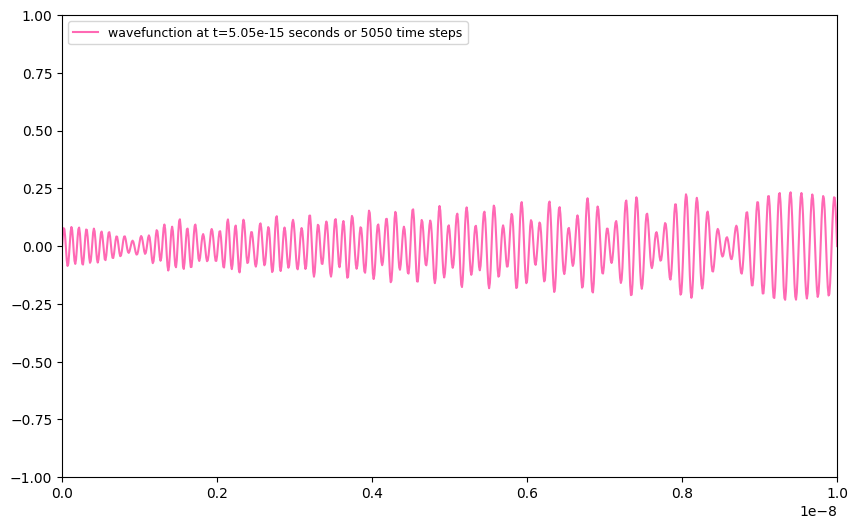

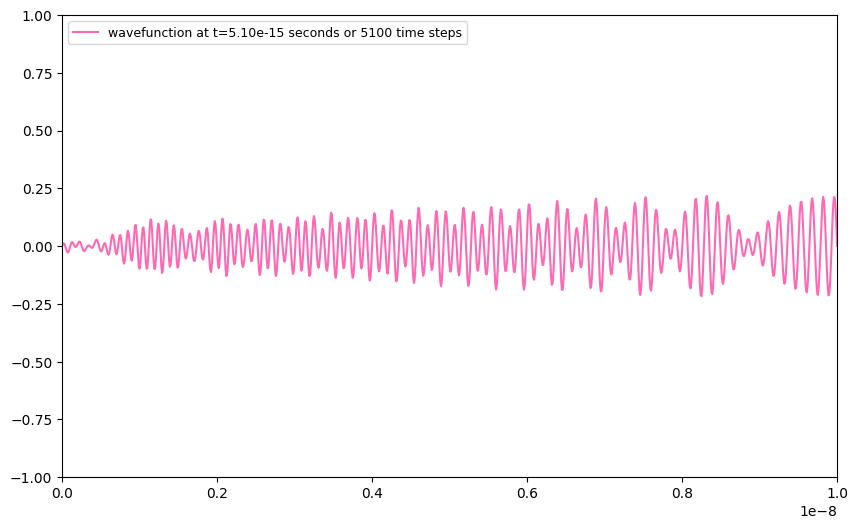

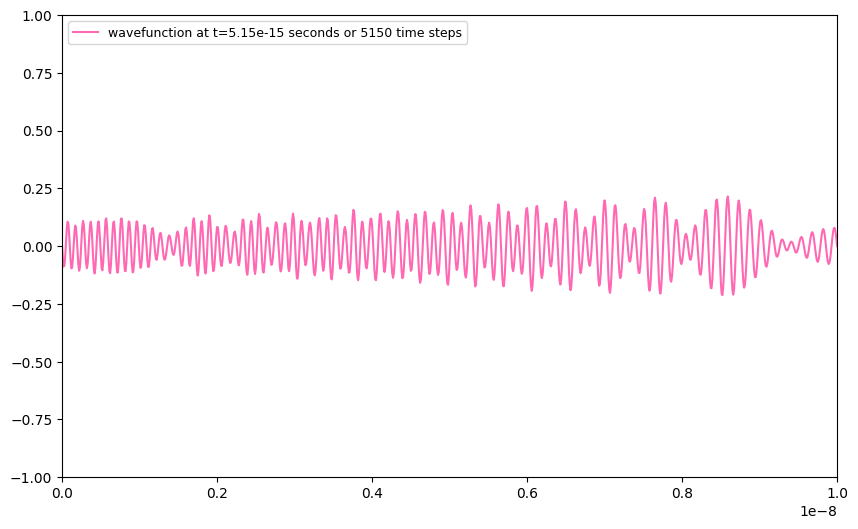

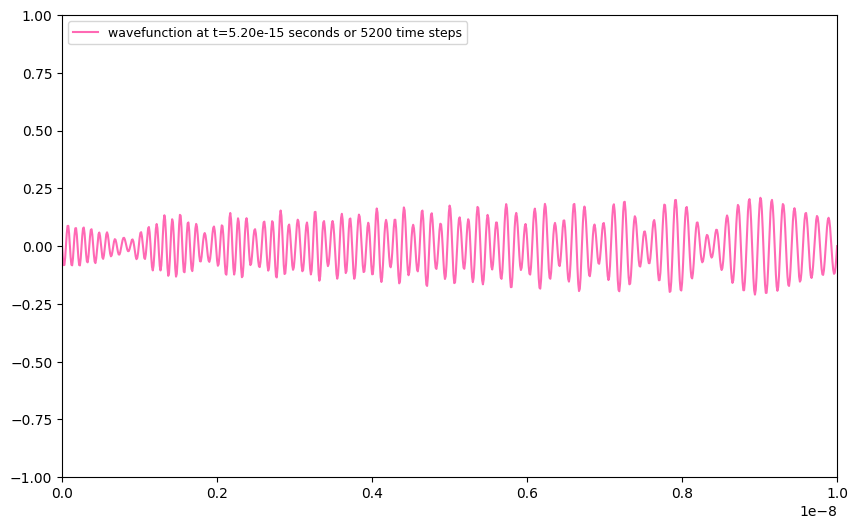

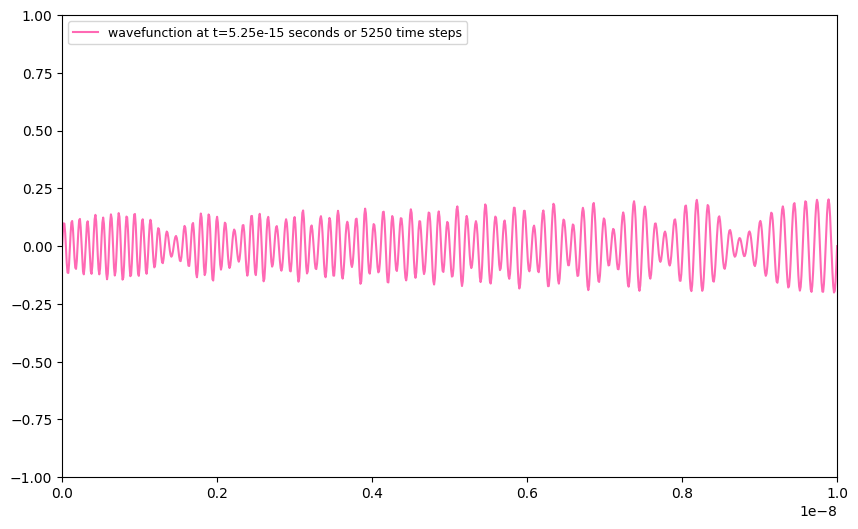

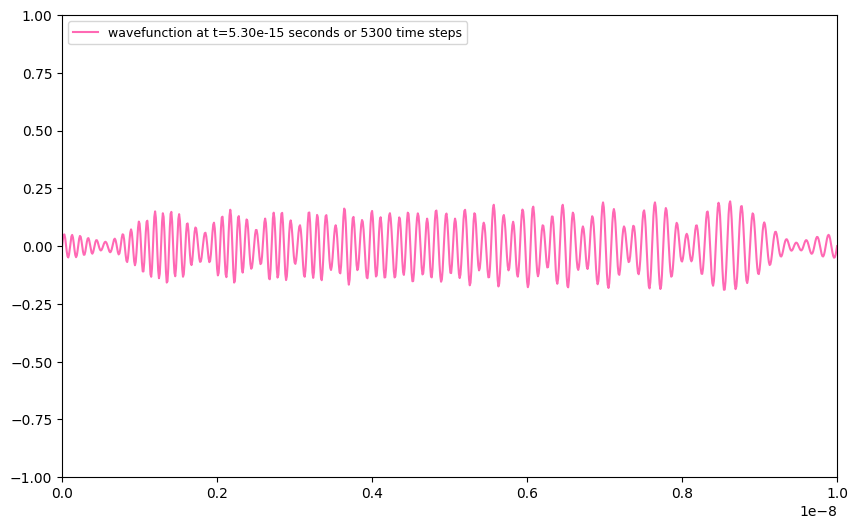

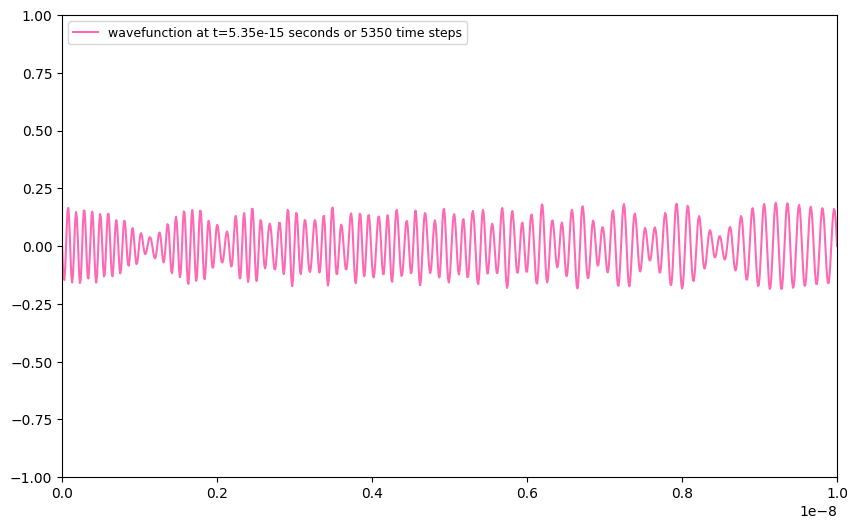

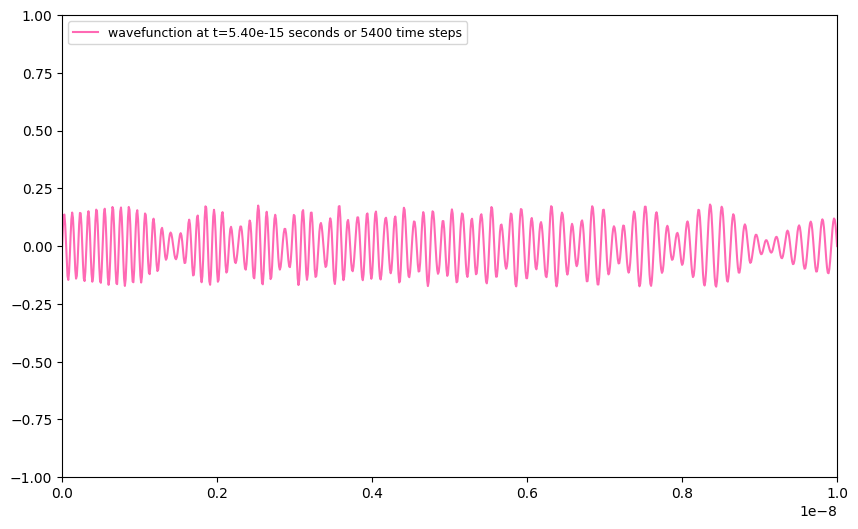

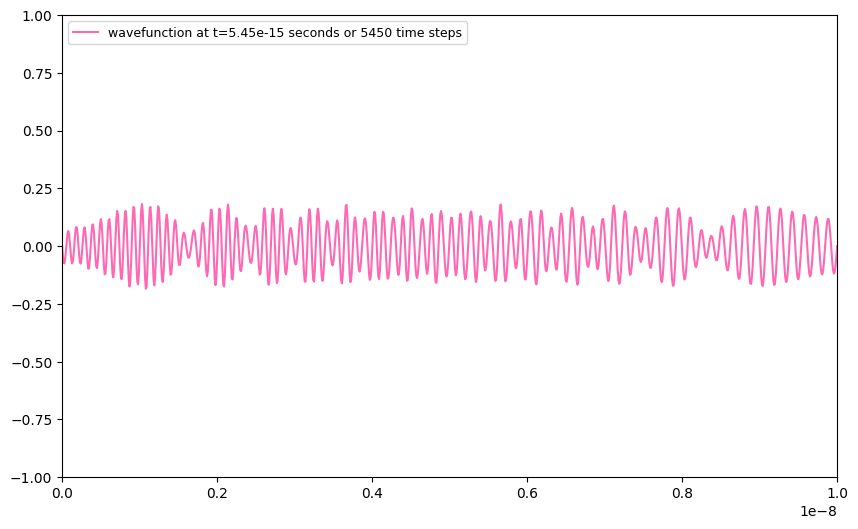

In [3]:
#	time evolution loop
for i in range(5500):
	v = b1*psi[1:N] + b2*(psi[2:N+1] + psi[0:N-1])		#	derived from v=B*wavefunction. elements of v depend on the wavefunction
	psi[1:N] = banded(A,v,1,1)							#	updates wave function using banded()
	
	#	plotting every 50 time steps until the 5500th time step
	if i % 50 == 0:
		plt.figure(figsize=(10,6))
		plt.plot(x, psi, color='hotpink', label='wavefunction at t='+str("{:.2e}".format(i*h))+' seconds or '+str(i)+' time steps')
		plt.ylim(-1,1)
		plt.xlim(0,L)									#	limit x boundary walls of box
		plt.legend(loc='upper left', fontsize='9')
		plt.show()
											
		# plt.savefig(f'plot{i+1}.png')					#	save plots as PNG file (remove comment to save plots)

#===============================================================#
#																#
#	110 plots ahead. scroll all the way down or collapse output	#
#																#
#===============================================================#
		

<video width="800" controls>
    <source src="lab_module5_animationVideo.mp4" type="video/mp4">
    Your browser does not support the video tag.
</video>

Initially, we have a wave packet centered at $x_0$ which is $L/2$. Its spread is determined by $\sigma$. The wavefunction has a positive $\kappa$ which means the momentum is also positive. This allows the wave packets to propagate to the right at $t>0$. 

When the wave packets reach the boundaries at $x=0$ and $x=L$, they are reflected back in the opposite direction. The incident and reflected waves meet, creating an interference pattern described by the superposition of its amplitudes. Constructive interference occurs when the waves are in phase (crest+crest or trough+trough). Destructive interference occurs when waves are out of phase (crest + trough). The combinations of these interference make up the overall interference pattern and envelop.

The Heisenberg's Uncertainty Principle implies that the spread $\sigma$ has an inverse relationship with the uncertainty in the momentum. A greater spread (position is more uncertain) means less uncertainty in momentum, meaning it could be measured with more confidence. Conversely, less spread (position is less uncertain) means more momentum uncertainty. Moreover, the more precisely the position is determined, the less precisely momentum can be known, and vice versa.

